**[Milestone 1 and 2 combination]**

# **Milestone 1**

### **Context:**

 - Why is this problem important to solve?

### **The objective:**

 - What is the intended goal?

### **The key questions:**

- What are the key questions that need to be answered?



### **The problem formulation**:

- What is it that we are trying to solve using data science?

## **Data Dictionary**

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM

**Fuel_Type** : The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC

**Power** : The maximum power of the engine in bhp

**Seats** : The number of seats in the car

**New_Price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 (**Target Variable**)

## **Important Notes**

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for each Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook will give you a direction on what steps need to be taken in order to get a viable solution to the problem. Please note that this is just one way of doing this. There can be other 'creative' ways to solve the problem and we urge you to feel free and explore them as an 'optional' exercise. 

- In the notebook, there are markdown cells called - Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. Please consider the code provided in this notebook as a sample code.

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they wish to explore different techniques. 

# **Milestone 1** 

### **Loading libraries**

In [1]:
# Import required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

### **Let us load the data**

We use Google Colab this time. We mount the Google Drive on Colab.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv('/content/drive/MyDrive/MIT_professional_edu_applied_data_science/project/capstone_project/used_cars.csv') 


### **Understand the data by observing a few rows**

In [4]:
# View first 5 rows

data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [5]:
# View last 5 rows Hint: Use tail() method

data.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.6,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.6,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.1,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.6,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.00,2148.0,170.0,5.0,NaN,NaN


**Observations and Insights:   
-It seems S.No. is like index.  
-Name is all together combined of brand and model and detailed code.  
-We see many of New_price and Price are NaN.    
-The Price of the used cars that is the dipendent variable. We are going to predict appropriate price from the indipendent variables through machine learning.
**

### **Let us check the data types and and missing values of each column** 

In [6]:
# Check the datatypes of each column. Hint: Use info() method

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


In [7]:
# Check total number of missing values of each column. Hint: Use isnull() method
data.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_price            6247
Price                1234
dtype: int64

**Observations and Insights:   
-There are total 7253 observations and 14 columns.    
-However, there are missing values in the 6 columns with  Mileage, Engine, Power, Seats, New_price, and Price. So these colums have less the number of observations. We will take care of them later.    
-The colums with Name, Location, Fuel_Type, Transmission, and Owner_Type are object that is data type. They are string and can be categorical variables.    
-Other variables are numerical values.   
**

Optionally, we check the ratio how many percent of missing values are beloging each valuables.

In [8]:
(data.isnull().sum()/data.shape[0])*100

S.No.                 0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.027575
Engine                0.634220
Power                 2.412795
Seats                 0.730732
New_price            86.129877
Price                17.013650
dtype: float64

We can observe that `S.No.` has no null values. Also the number of unique values are equal to the number of observations. So, `S.No.` looks like an index for the data entry and such a column would not be useful in providing any predictive power for our analysis. Hence, it can be dropped.

In [9]:
# Remove S.No. column from data. Hint: Use inplace = True
data.drop(columns = ['S.No.'], inplace = True)

## **Exploratory Data Analysis**

### **Let us now explore the summary statistics of numerical variables**

In [10]:
# Explore basic summary statistics of numeric variables. Hint: Use describe() method.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.000,2014.00,2016.0000,2019.00
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.000,53416.00,73000.0000,6500000.00
Mileage,7251.0,18.141580,4.562197,0.00,15.170,18.16,21.1000,33.54
Engine,7207.0,1616.573470,595.285137,72.00,1198.000,1493.00,1968.0000,5998.00
Power,7078.0,112.765214,53.493553,34.20,75.000,94.00,138.1000,616.00
Seats,7200.0,5.280417,0.809277,2.00,5.000,5.00,5.0000,10.00
New_price,1006.0,22.779692,27.759344,3.91,7.885,11.57,26.0425,375.00
Price,6019.0,9.479468,11.187917,0.44,3.500,5.64,9.9500,160.00


**Observations and Insights:    
-It seems Year is close to normal distribution. The mean 2013.36 and the 50%(median) 2014 is close numbers.  
-In Seats, the mean and 50%(median) are 5.280417 and 5.0 respectively. This is close to normal distribution. And 25% and 75% are also 5.0. That means the curve will be very skewed to the middle. The standard deviation is 0.80 that can assume storongly narrow.   
-In Kilometers_Driven, there is an outlier that is impossible distance in max 6500000. It supposed be input incorrectly. The mean and the 50%(median) are too different amount as 58699.06 and 53416. The mean is too large compared to the median.  The standard deviation is 84427.72 which is very disparse. There are probably outliers existing.  
-In Mileage, the mean and 50%(median) are also close. They are 18.141580 and 18.16 respectively.  25% and 75% are disparsed with std 4.56. There is min as 0. But we don't think there is 0 mileage. We take care of it later.  
-New_price has very disparsed standard diviation as 27.7593. There may a lot of outliers. The mean and the 50%(median) are very different amount as 22.77 and 11.57 respectively.   
-It seems Price has same kind of trend as New_price.   
-New_price and Price have a lot of missing values that we need to check later on.


**

### **Let us also explore the summary statistics of all categorical variables and the number of unique observations in each category**

In [11]:
# Explore basic summary statistics of categorical variables. Hint: Use the argument include = ['object'] 
data.describe(include= ['object']).T

,count,unique,top,freq
Name,7253,2041,Mahindra XUV500 W8 2WD,55
Location,7253,11,Mumbai,949
Fuel_Type,7253,5,Diesel,3852
Transmission,7253,2,Manual,5204
Owner_Type,7253,4,First,5952


**Number of unique observations in each category**

In [12]:
cat_cols = data.select_dtypes(include = ['object']).columns

for column in cat_cols:
    
    print("For column:", column)
    
    print(data[column].value_counts())
    
    print('-'*50)

For column: Name
Mahindra XUV500 W8 2WD                  55
Maruti Swift VDI                        49
Maruti Swift Dzire VDI                  42
Honda City 1.5 S MT                     39
Maruti Swift VDI BSIV                   37
                                        ..
Chevrolet Beat LT Option                 1
Skoda Rapid 1.6 MPI AT Elegance Plus     1
Ford EcoSport 1.5 TDCi Ambiente          1
Hyundai i10 Magna 1.1 iTech SE           1
Hyundai Elite i20 Magna Plus             1
Name: Name, Length: 2041, dtype: int64
--------------------------------------------------
For column: Location
Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64
--------------------------------------------------
For column: Fuel_Type
Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Typ

#### **Observations and Insights:   
-There is no missing values in categorical data.    
-Name has 2041 uniques. Most freqently comes up name is Mahindra XUV500 W8 2WD with 55 times.  The each of Name is too unique which is hard to make grouping. We need to check later how we can take care of it.  
-Location has 11 uniques. Mumbai is the most frequently inputted word. The frequency was 949.    
-4 kinds of Fuel_Type are there.  Diesel is the most frequently comes up as 3852 times.   
-Transmission has Manual and Automatic. Manual comes up 5204 times.   
-Owner_Type has First, Second, Third, and Forth and Above.  The Owner_Type with First is the most frequently coming up as 5952 times.   




**

**Think About It**: 

- We could observe from summary statistics that kilometers_driven has extreme values. Can we look at the manufactured year for cars with extreme values for kilometers_driven? 
- Also, we could observe the feature mileage has values zero. Can the mileage of a car be zero?

**Let's explore the two points mentioned above**

**Check Kilometers_Driven extreme values**

In [13]:
# Sort the dataset in 'descending' order using the feature 'Kilometers_Driven'
data.sort_values(by = 'Kilometers_Driven', ascending = False).head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.00,5.0,NaN,65.00
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.30,1968.0,141.00,5.0,NaN,7.50
1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,5.90
358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36,1197.0,78.90,5.0,NaN,2.70
2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480000,Diesel,Automatic,First,16.96,1968.0,138.03,5.0,NaN,13.00
3092,Honda City i VTEC SV,Kolkata,2015,480000,Petrol,Manual,First,17.40,1497.0,117.30,5.0,NaN,5.00
4491,Hyundai i20 Magna Optional 1.2,Bangalore,2013,445000,Petrol,Manual,First,18.50,1197.0,82.90,5.0,NaN,4.45
6921,Maruti Swift Dzire Tour LDI,Jaipur,2012,350000,Diesel,Manual,First,23.40,1248.0,74.00,5.0,NaN,NaN
3649,Tata Indigo LS,Jaipur,2008,300000,Diesel,Manual,First,17.00,1405.0,70.00,5.0,NaN,1.00
1528,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,Hyderabad,2005,299322,Diesel,Manual,First,12.80,2494.0,102.00,8.0,NaN,4.00


#### **Observations and Insights:   
As we see the Kilometer_Driven with 6500000, the manufuctuing year is 2017. Other cars are much older than this car but their Kilometer_Driven absolutely 1/10 times below. We assume the number 65000000 is error to input.   **


In the first row, a car manufactured as recently as 2017 having been driven 6500000 km is almost impossible. It can be considered as data entry error and so we can remove this value/entry from data.

In [14]:
# Removing the 'row' at index 2328 from the data. Hint: use the argument inplace=True
data.drop(index = 2328, inplace=True)

**Check Mileage extreme values**

In [15]:
# Sort the dataset in 'ascending' order using the feature 'Mileage'
# I change the code from 'sort' to 'sort_values' because 'sort' has been replaced in v2.0 by new codes such as 'sort_values' and 'sort_index'.
# By default, sort function is already 'ascending' in Python so we don't put anything about it for 'ascending'.
data.sort_values(by = 'Mileage').head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2597,Hyundai Santro Xing XP,Pune,2007,70000,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,1.12
2343,Hyundai Santro AT,Hyderabad,2006,74483,Petrol,Automatic,First,0.0,999.0,NaN,5.0,NaN,2.30
5270,Honda City 1.5 GXI,Bangalore,2002,53000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,1.85
424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.0,1968.0,NaN,5.0,NaN,5.45
6857,Land Rover Freelander 2 TD4 SE,Mumbai,2011,87000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,NaN
443,Hyundai Santro GLS I - Euro I,Coimbatore,2012,50243,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,3.35
5119,Hyundai Santro Xing XP,Kolkata,2008,45500,Petrol,Manual,Second,0.0,1086.0,NaN,5.0,NaN,1.17
5022,Land Rover Freelander 2 TD4 SE,Hyderabad,2013,46000,Diesel,Automatic,Second,0.0,2179.0,115.0,5.0,NaN,26.00
5016,Land Rover Freelander 2 TD4 HSE,Delhi,2013,72000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,15.50
2542,Hyundai Santro GLS II - Euro II,Bangalore,2011,65000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,3.15


#### **Observations**
* Mileage of cars can not be 0, so we should treat 0's as missing values. We will do it in the Feature Engineering part.

## **Univariate Analysis**
Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables.

## **1. Univariate Analysis - Numerical Data**
Histograms and box plots help to visualize and describe numerical data. We use box plot and histogram to analyse the numerical columns.

In [16]:
# Let us write a function that will help us create a boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and returns the boxplots and histograms for the variable.

def histogram_boxplot(feature, figsize = (15, 10), bins = None):
    
    """ Boxplot and histogram combined
    
    feature: 1-d feature array
    
    figsize: size of fig (default (9, 8))
    
    bins: number of bins (default None / auto)
    
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid = 2
                                           sharex = True, # X-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # Creating the 2 subplots
    
    sns.boxplot(feature, ax = ax_box2, showmeans = True, color = 'violet') # Boxplot will be created and a symbol will indicate the mean value of the column
    
    sns.distplot(feature, kde = F, ax = ax_hist2, bins = bins, palette = "winter") if bins else sns.distplot(feature, kde = False, ax = ax_hist2) # For histogram
    
    ax_hist2.axvline(np.mean(feature), color = 'green', linestyle = '--') # Add mean to the histogram
    
    ax_hist2.axvline(np.median(feature), color = 'black', linestyle = '-') # Add median to the histogram

**Let us plot histogram and box-plot for the feature 'Kilometers_Driven' to understand the distribution and outliers, if any.**

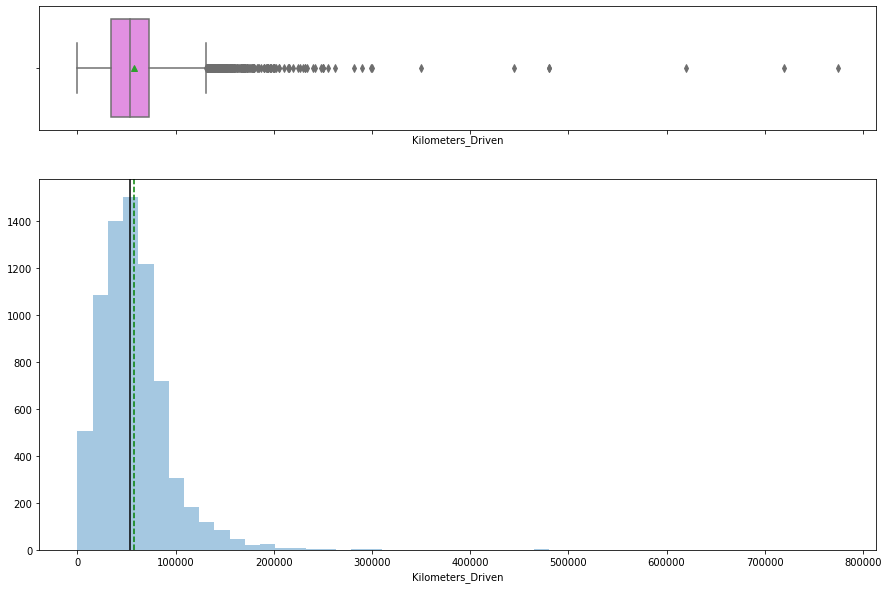

In [17]:
# Plot histogram and box-plot for 'Kilometers_Driven'
histogram_boxplot(data['Kilometers_Driven'])

**Think About It**: Kilometers_Driven is highly right-skewed. Can we use Log transformation of the feature to reduce/remove the skewness? Why can't we keep skewed data?

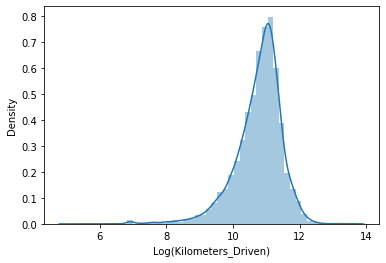

In [18]:
# Log transformation of the feature 'Kilometers_Driven'
sns.distplot(np.log(data["Kilometers_Driven"]), axlabel = "Log(Kilometers_Driven)");

**Observations and Insights:   
Kilometers_Driven became close to normal distribution by log transformation.**

In [19]:
# We can add a transformed kilometers_driven feature in data
data["kilometers_driven_log"] = np.log(data["Kilometers_Driven"])

**Note:** Like Kilometers_Driven, the distribution of Price is also highly skewed, we can use log transformation on this column to see if that helps normalize the distribution. And add the transformed variable into the dataset. You can name the variable as **'price_log'**.

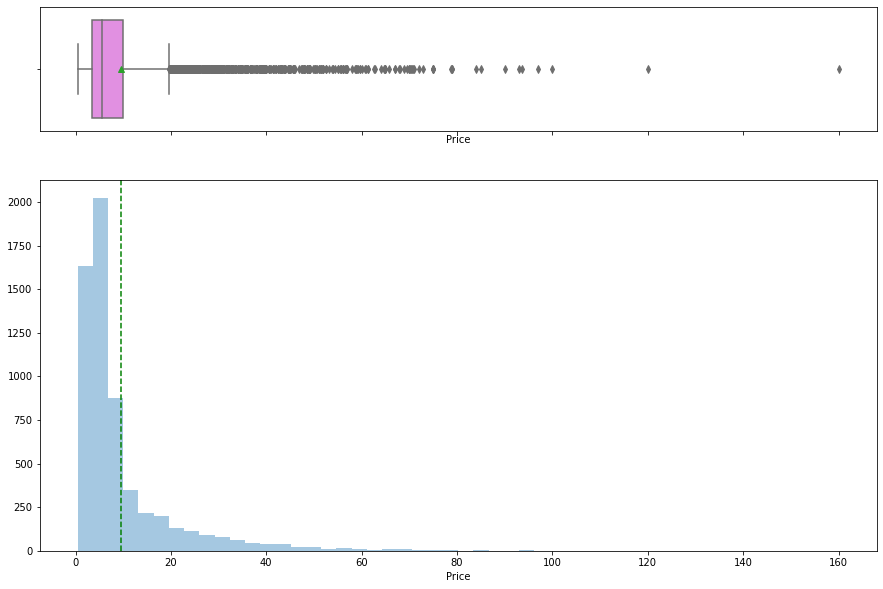

In [20]:
# Plot histogram and box-plot for 'Price'
histogram_boxplot(data['Price'])


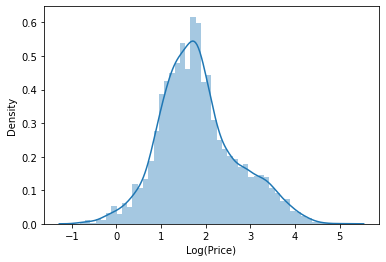

In [21]:
# Log transformation of the feature 'Price'
sns.distplot(np.log(data["Price"]), axlabel = "Log(Price)");


In [22]:
# We can Add a transformed Price feature in data
data['price_log'] = np.log(data['Price'])


**Note:** Try plotting histogram and box-plot for different numerical features and understand how the data looks like.

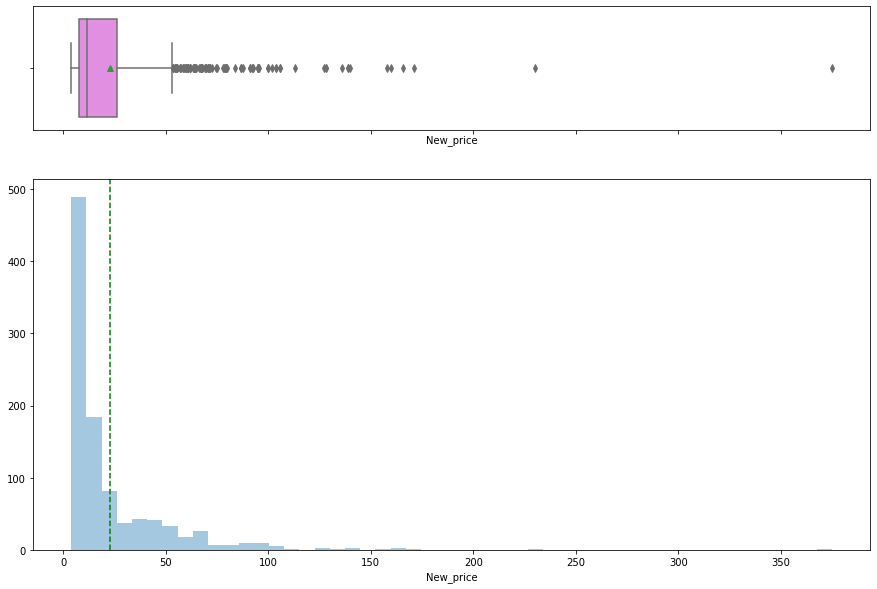

In [23]:
# Plot histogram and box-plot for 'New_price'
histogram_boxplot(data['New_price'])

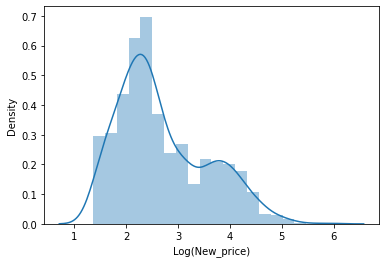

In [24]:
# Log transformation of the feature 'New_price'
sns.distplot(np.log(data["New_price"]), axlabel = "Log(New_price)");

In [25]:
# We can Add a transformed New_price feature in data
data['new_price_log'] = np.log(data['New_price'])

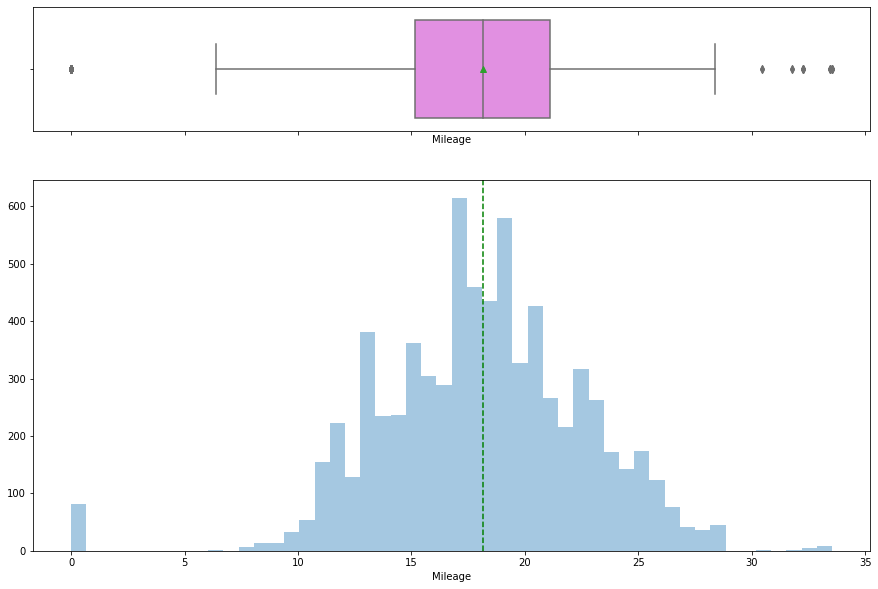

In [26]:
# Plot histogram and box-plot for 'Mileage'
histogram_boxplot(data['Mileage'])

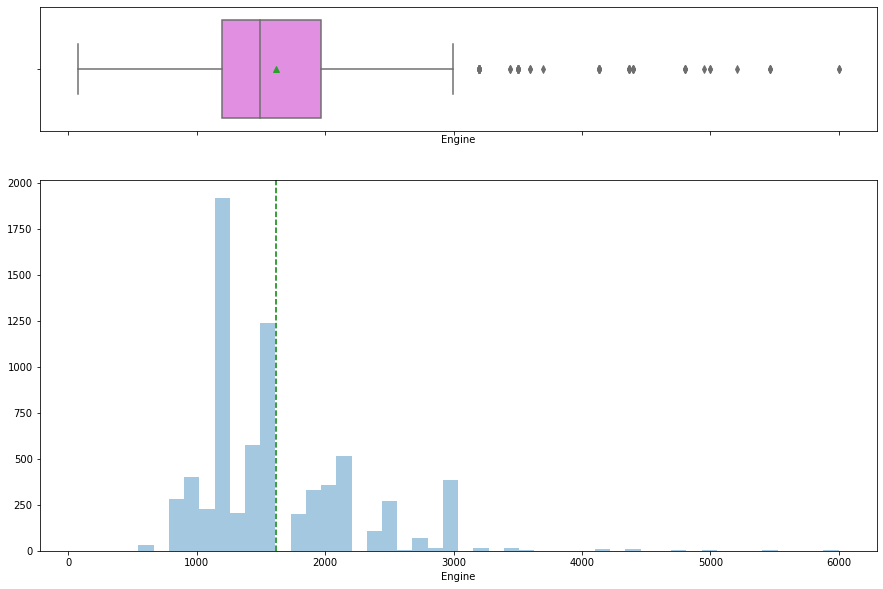

In [27]:
# Plot histogram and box-plot for 'Engine'
histogram_boxplot(data['Engine'])

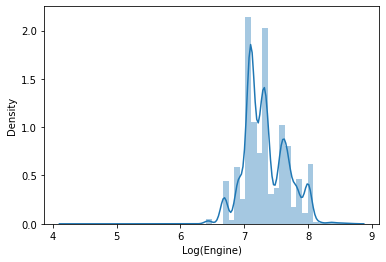

In [28]:
# Log transformation of the feature 'Engine'
sns.distplot(np.log(data["Engine"]), axlabel = "Log(Engine)");

In [29]:
# We can Add a transformed New_price feature in data
data['engine_log'] = np.log(data['Engine'])

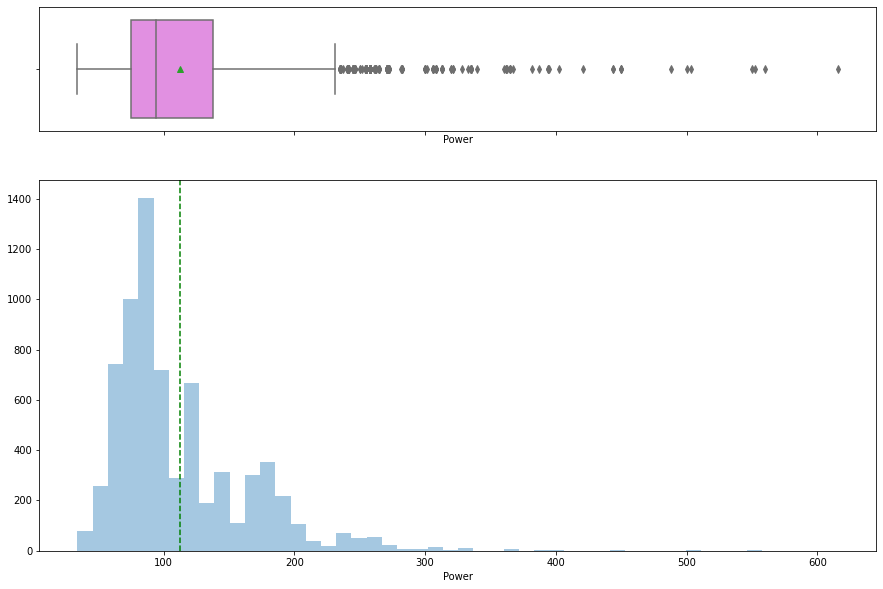

In [30]:
# Plot histogram and box-plot for 'Power'
histogram_boxplot(data['Power'])

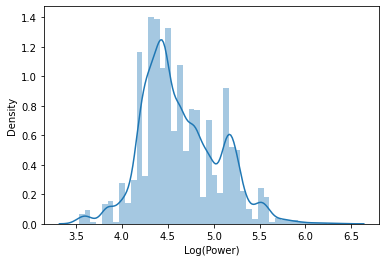

In [31]:
# Log transformation of the feature 'Power'
sns.distplot(np.log(data["Power"]), axlabel = "Log(Power)");

In [32]:
# We can Add a transformed New_price feature in data
data['power_log'] = np.log(data['Power'])

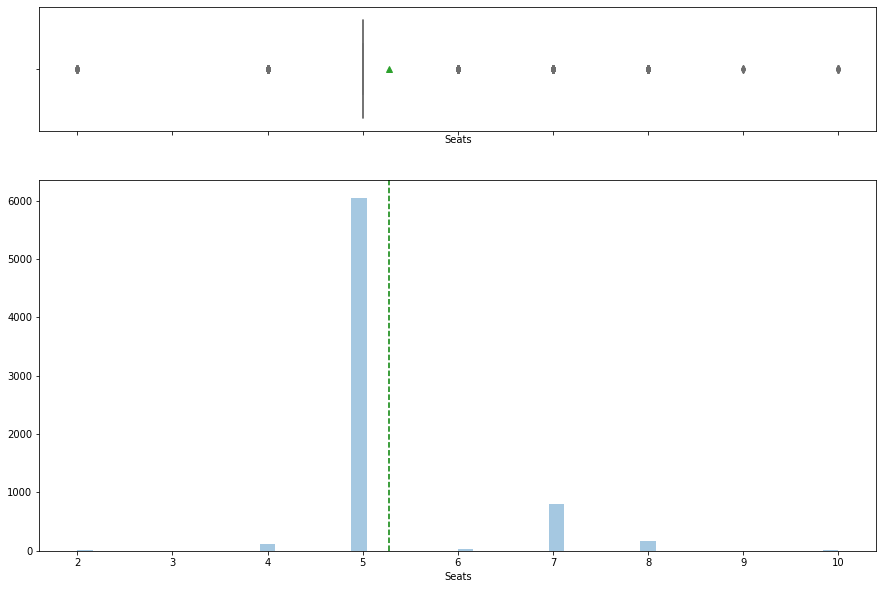

In [33]:
# Plot histogram and box-plot for 'Seats'
histogram_boxplot(data['Seats'])

**Observations and Insights for all the plots:  
By using log, the plot with highly skewed right became close to Normal distribution in Engine, Power, Price, and New_price.   

**


## **2. Univariate analysis - Categorical Data**

In [34]:
# Let us write a function that will help us create barplots that indicate the percentage for each category.
# This function takes the categorical column as the input and returns the barplots for the variable.

def perc_on_bar(z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(data[z]) # Length of the column
    
    plt.figure(figsize = (15, 5))
    
    ax = sns.countplot(data[z], palette = 'Paired', order = data[z].value_counts().index)
    
    for p in ax.patches:
        
        percentage = '{:.1f}%'.format(100 * p.get_height() / total) # Percentage of each class of the category
        
        x = p.get_x() + p.get_width() / 2 - 0.05 # Width of the plot
        
        y = p.get_y() + p.get_height()           # Hieght of the plot
        
        ax.annotate(percentage, (x, y), size = 12) # Annotate the percantage 
    
    plt.show() # Show the plot

**Let us plot barplot for the variable location. It will be helpful to know the number of percentage of cars from each city.**

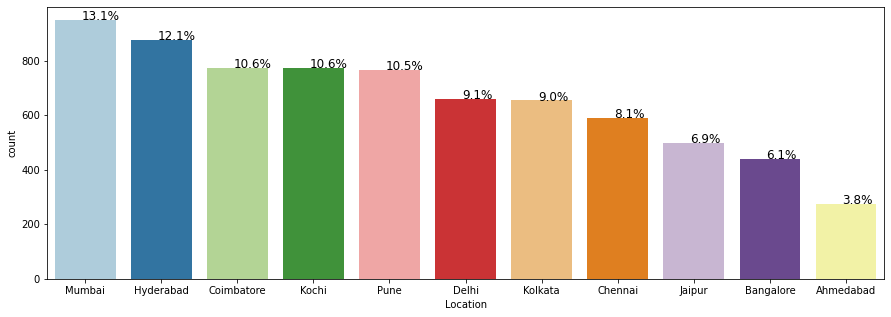

In [35]:
# Bar Plot for 'Location'
perc_on_bar('Location')

**Note:** Explore for other variables like Year, Fuel_Type, Transmission, Owner_Type`.

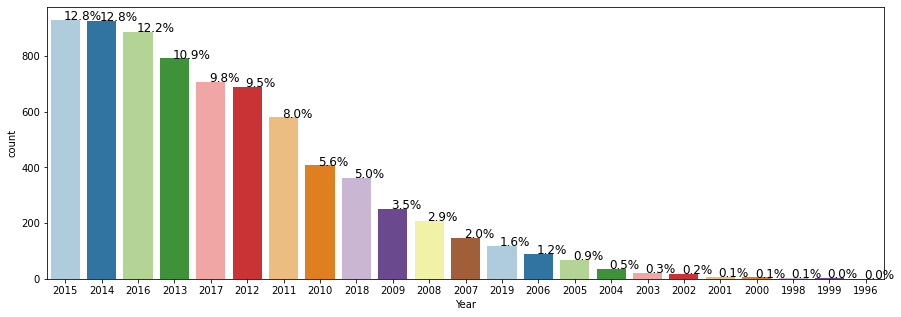

In [36]:
perc_on_bar('Year')

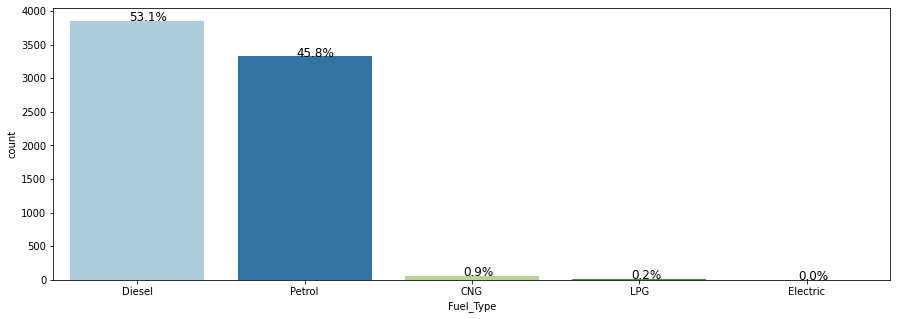

In [37]:
perc_on_bar('Fuel_Type')

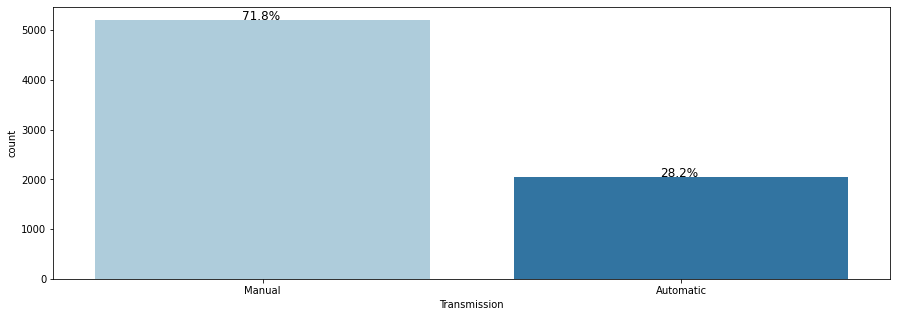

In [38]:
perc_on_bar('Transmission')

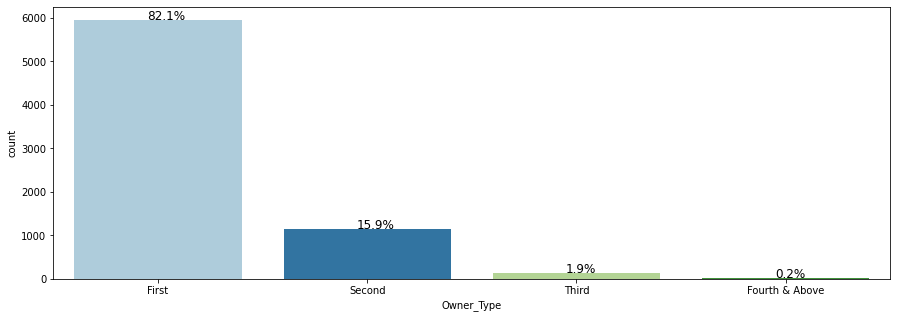

In [39]:
perc_on_bar('Owner_Type')

**Observations and Insights from all plots:   
-Location:  Mumbai has the largest number of used cars. Delhi has the largest population in India but it is the 6th for holding used cars. It may be there are other transportaions available to people use so it is not the largest share of used cars regardless of the population. Hyderabad is the 2nd.   
-Year: When the year is younger, the number of cars is larger. On the other hand, as getting older and older, the number of cars becomes redusing.  Majorlity is up to 2017.    
-Fuel_Type: Diesel has 53.1% shares which is the largest. Petrol is 45.8% shares. The total share of these two is already 98.9%. Other types such as CNG, LPG, and Electric are very tiny compared to these two.   
-Transmission:  Manual is 71.8% shares. Automatic is 28.2% shares.Manual dominates more than twice of Automatic.   
-Owner_Type:  First owner shares 82.1%. Second owner shares 15.9%. Third owner shares 1.9%. And Forth &Above owner is 0.2%.  

**

## **Bivariate Analysis**

### **1. Scatter plot**
A scatter plot allows us to see relationships between two variables. 

**Note: Use log transformed values 'kilometers_driven_log' and 'price_log'**

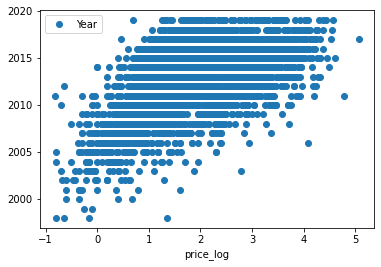

In [40]:
# Let us plot pair plot for the variables 'year' and 'price_log'
data.plot(x = 'price_log', y = 'Year', style = 'o')

<b>Note:</b> Try to explore different combinations of independent variables and dependent variable. Understand the relationship between all variables.

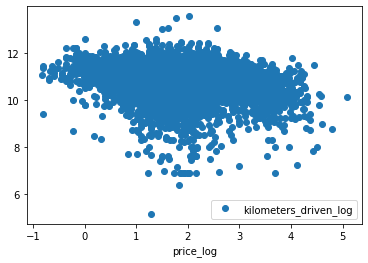

In [41]:
data.plot(x = 'price_log', y = 'kilometers_driven_log', style = 'o')

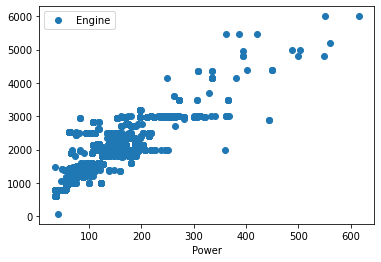

In [42]:
data.plot(x = 'Power', y = 'Engine', style = 'o')

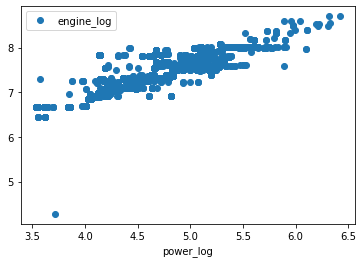

In [43]:
data.plot(x = 'power_log', y = 'engine_log', style = 'o')

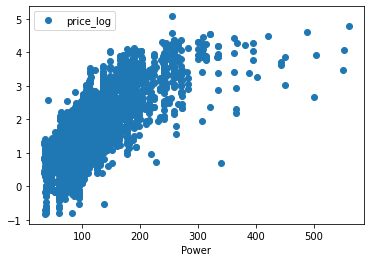

In [44]:
data.plot(x = 'Power', y = 'price_log', style = 'o')

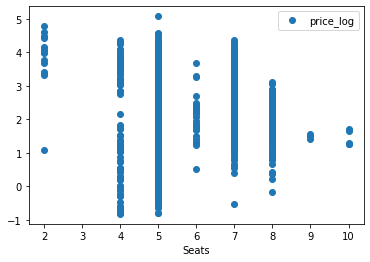

In [45]:
data.plot(x = 'Seats', y = 'price_log', style = 'o')

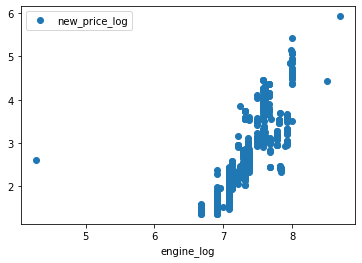

In [46]:
data.plot(x = 'engine_log', y = 'new_price_log', style = 'o')

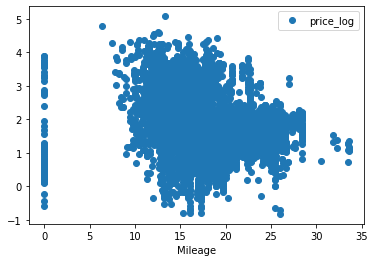

In [47]:
data.plot(x = 'Mileage', y = 'price_log', style = 'o')

**Observations and Insights from all plots:   

-Between pice_log and Year, it has some positive correlation it is not srtong.   
-Between price_log and kilometers_drive_log, there is no correlation.   
-Between Power and Engine, they have positively related. The trend looks like 45 degrees so correlation is strong.  
-Between power_log and engine_log, they have positively related.   
-Between price_log and Seats, since the price_log is numerical while the Seats is categorical, there is no correlation. But we can see the category 5 seats covers the most price range.   
-Between engine_log and new_price_log, there is storing positive relationship. The line is very steep.     
-Between Mileage and price_log, there is no correlation.  
**


### **2. Heat map**
Heat map shows a 2D correlation matrix between two numerical features.

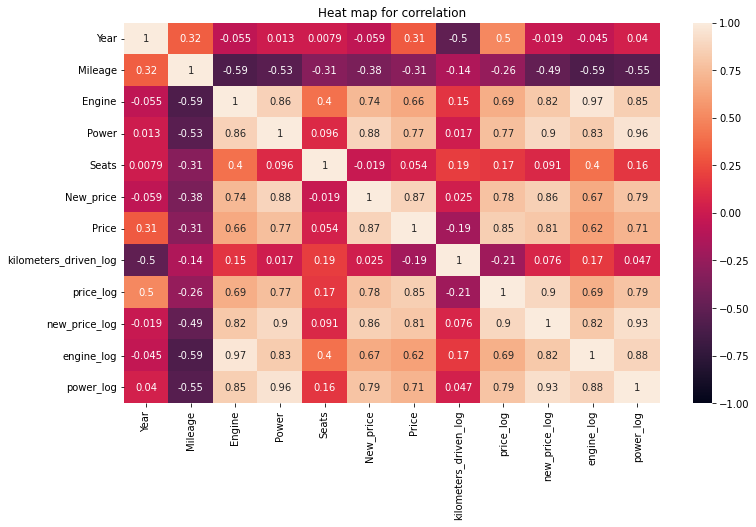

In [48]:
# We can include the log transformation values and drop the original skewed data columns
plt.figure(figsize = (12, 7))

sns.heatmap(data.drop(['Kilometers_Driven'],axis = 1).corr(), annot = True, vmin = -1, vmax = 1)

plt.title('Heat map for correlation')

plt.show()

**Observations and Insights:   
-Price and New_price is highly correlated as 0.87. Also, Price_log and new_price_log are strongly correlated as 0.9.  

-Engine with New_price and Price also very correlated  as 0.74 and 0.66 respectively.  engine_log with new_price_log and price_log are samething as above. The correlation between engine_log and new_price_log is 0.82. Between engine_log and price_log is 0.69.  

-Power has also same tenday. Between Power and New_price, 0.88 correlation. Between Power and Price, the correlation is 0.77.  power_log with new_price_log and price_log has same. The correlations are 0.93 and 0.79 respectively.   

-Engine and Power strongly positively correlted as well. The correlation is 0.86.   

-Mileage has negative correlation with all of other variables except Year.   
Year also has negative and posiive correlation but all of them are not really strongly correlated.  
**

### **3. Box plot**

In [49]:
# Let us write a function that will help us create boxplot w.r.t Price for any input categorical variable.
# This function takes the categorical column as the input and returns the boxplots for the variable.
def boxplot(z):
    
    plt.figure(figsize = (12, 5)) # Setting size of boxplot
    
    sns.boxplot(x = z, y = data['Price']) # Defining x and y
    
    plt.show()
    
    plt.figure(figsize = (12, 5))
    
    plt.title('Without Outliers')
    
    sns.boxplot(x = z, y = data['Price'], showfliers = False) # Turning off the outliers
    
    plt.show()

#### Let us now plot bivariate analysis of target variable with a categorical variable 'Location'

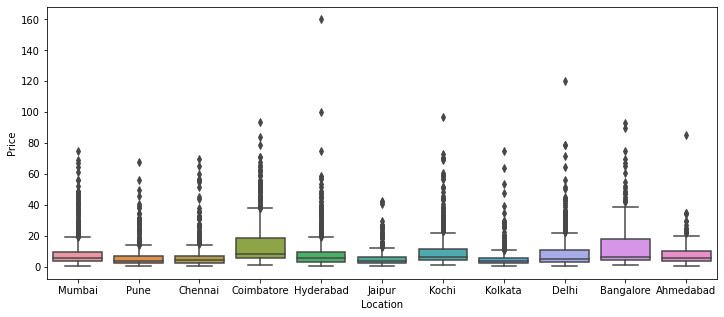

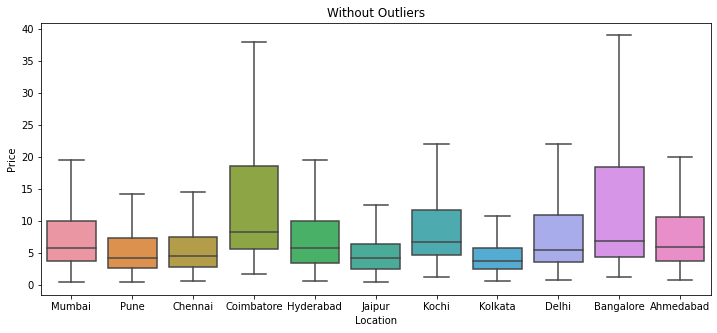

In [50]:
# Box Plot: Price vs Location
boxplot(data['Location'])

<b>Note: </b> Explore by plotting box-plots for target variable and the other categorical variables like Fuel_Type, transmission, Owner_type.

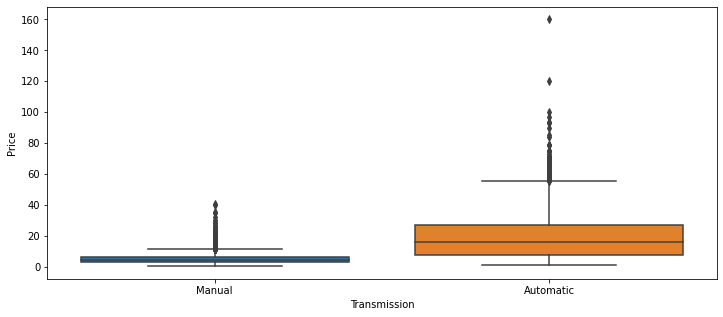

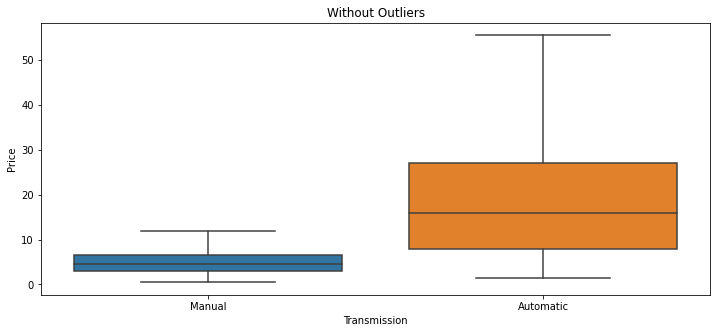

In [51]:
# Box Plot: Price vs Transmission
boxplot(data['Transmission'])

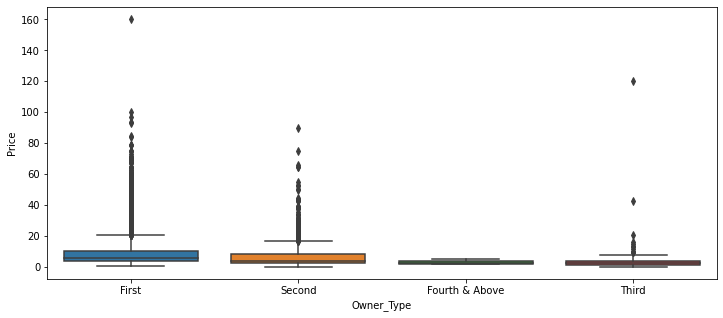

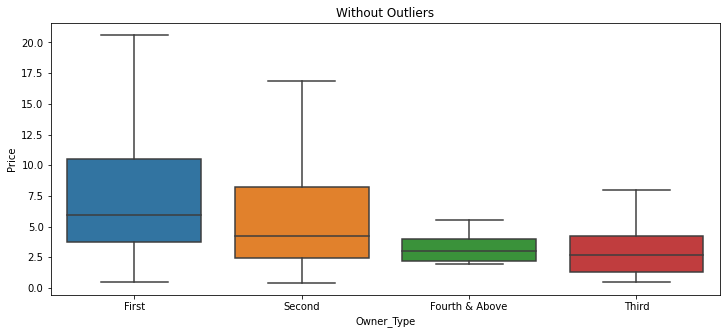

In [52]:
# Box Plot: Price vs Owner_Type
boxplot(data['Owner_Type'])

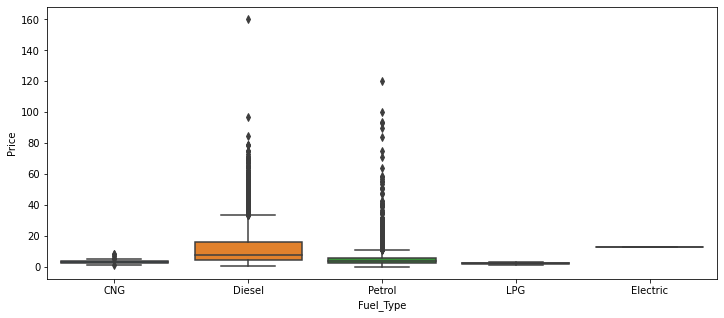

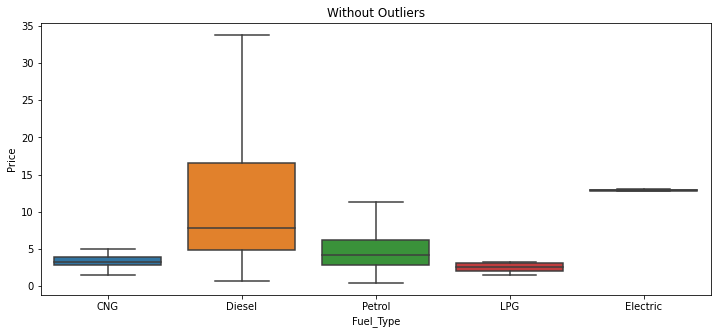

In [53]:
# Box Plot: Price vs Seats
boxplot(data['Fuel_Type'])

**Observations and Insights for all plots:  
-In Location, without Outlier, all of locations became wider price range of 25% and 75%. Especially, Coimbatore and Bangalore became the widest in the location.   
-Transmission: Automatic is much expensive than Manual. The median of Automatic is almost triple of the median of Manual. The price of manual is very narrow range even if it is without outlier.   
-Owner_Type: First owner has the widest range of the price and the median is the highest in Owner_Type. The median of Foruth & Above owner and Thirs owner are almost same.   
-Fuel_Type: Diesel has the widest range of the price in 5 types of Fuel. The median is 2nd with Diesel. Petrol is the second widest but the price range is very narrow compared to Diesel and the median is lower than Diesel. There are CNG and LPG as well but the price of the ranges are too narrow compared to Deisel and Petrol. And the medians are also lower than other 2 Fuels. I see Electric is like 1 line that means too thin even I can see the range. But the median is the highest in the Fuel_Type.   





**


### **Feature Engineering**

**Think about it:** The `Name` column in the current format might not be very useful in our analysis.
Since the name contains both the brand name and the model name of the vehicle, the column would have too many unique values to be useful in prediction. Can we extract that information from that column? 

* **Hint:** With 2041 unique names, car names are not going to be great predictors of the price in our current data. But we can process this column to extract important information for example brand name.

In [54]:
# Creating brand
data["Name"] = data["Name"].str.replace(" New ", " ") # Omit "New" and then put space.
data['brand']=data.Name.str.split(' ').str.get(0)

data.brand.unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini', 'Hindustan', 'OpelCorsa'], dtype=object)

In [55]:

data['brand'] = data['brand'].apply(lambda x: 'ISUZU' if x == 'Isuzu' else x) # "ISUZU" and "Isuzu" are same brand. These are repetitions that need to both together. 
data.loc[(data.brand=='Mini'),'brand']='Mini Cooper' # brand name of "Mini Cooper" is 1 space between "i" and "C" that is split because of coding. So, we add the word "Cooper". 
data.loc[(data.brand == 'Land'),'brand']='Land Rover' # brand name of "Land Rover" is 1 space between "d" and "R" that is split because of coding. So, we add the word "Rover". 


# Creating model
data['model']=data['Name'].apply(lambda x: ''.join(x.split(' ')[1]))

# Creating column "brand_model"
data['brand_model'] = data["brand"] +" "+ data["model"]

data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,price_log,new_price_log,engine_log,power_log,brand,model,brand_model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,11.184421,0.559616,NaN,6.905753,4.063198,Maruti,Wagon,Maruti Wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,10.621327,2.525729,NaN,7.366445,4.837868,Hyundai,Creta,Hyundai Creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,10.736397,1.504077,2.152924,7.089243,4.485260,Honda,Jazz,Honda Jazz
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,11.373663,1.791759,NaN,7.129298,4.485936,Maruti,Ertiga,Maruti Ertiga
4,Audi A4 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,10.613246,2.875822,NaN,7.584773,4.947340,Audi,A4,Audi A4


In [56]:
# In order to check how many brand and model are existing, we do basic summary statistics of categorical variables again.
data.describe(include= ['object']).T

,count,unique,top,freq
Name,7252,2040,Mahindra XUV500 W8 2WD,55
Location,7252,11,Mumbai,949
Fuel_Type,7252,5,Diesel,3851
Transmission,7252,2,Manual,5204
Owner_Type,7252,4,First,5951
brand,7252,32,Maruti,1444
model,7252,218,Swift,418
brand_model,7252,221,Maruti Swift,418


#### **Observations and Insights:   
By extracting  model and brand from Name, we were able to split the variables. The unique numbers of brand, model, and brand_model are 32,  218, and 221 respectively.  

**

In [57]:
# Check the data
data['brand'].value_counts()

Maruti           1444
Hyundai          1340
Honda             743
Toyota            507
Mercedes-Benz     380
Volkswagen        374
Ford              351
Mahindra          331
BMW               311
Audi              285
Tata              228
Skoda             202
Renault           170
Chevrolet         151
Nissan            117
Land Rover         67
Jaguar             48
Fiat               38
Mitsubishi         36
Mini Cooper        31
Volvo              28
Porsche            19
Jeep               19
Datsun             17
ISUZU               5
Force               3
Bentley             2
Smart               1
Ambassador          1
Lamborghini         1
Hindustan           1
OpelCorsa           1
Name: brand, dtype: int64

Poplular cars's brand are Maruti and Hyundai.

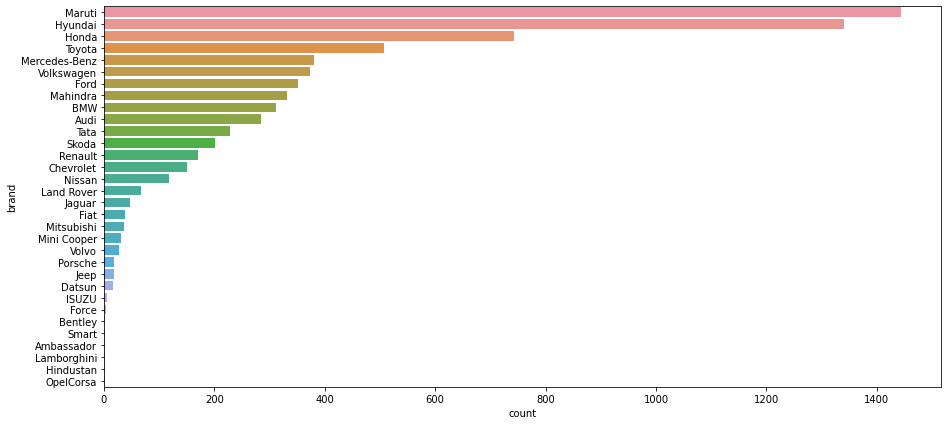

In [58]:
plt.figure(figsize = (15, 7))
sns.countplot(y = "brand", data = data, order = data["brand"].value_counts().index)
plt.show()

### **Missing value treatment**

In [59]:
# Now check the missing values of each column. Hint: Use isnull() method
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     2
Engine                     46
Power                     175
Seats                      53
New_price                6246
Price                    1234
kilometers_driven_log       0
price_log                1234
new_price_log            6246
engine_log                 46
power_log                 175
brand                       0
model                       0
brand_model                 0
dtype: int64

#### **Observations and Insights:   
There are missing values in Mileage, Engine, Power, Seats, New_price, Price, price_log, new_price_log, engine_log, and power_log.  
We are going to treat them.  
**

**Missing values in Seats**

In [60]:
# Checking missing values in the column 'Seats'
print(data[data['Seats'].isnull()])

                                              Name    Location  Year  \
194                             Honda City 1.5 GXI   Ahmedabad  2007   
208                           Maruti Swift 1.3 VXi     Kolkata  2010   
229                               Ford Figo Diesel   Bangalore  2015   
733                           Maruti Swift 1.3 VXi     Chennai  2006   
749                   Land Rover Range Rover 3.0 D      Mumbai  2008   
1294                             Honda City 1.3 DX       Delhi  2009   
1327                          Maruti Swift 1.3 ZXI   Hyderabad  2015   
1385                            Honda City 1.5 GXI        Pune  2004   
1460  Land Rover Range Rover Sport 2005 2012 Sport  Coimbatore  2008   
1917                            Honda City 1.5 EXI      Jaipur  2005   
2074                          Maruti Swift 1.3 LXI        Pune  2011   
2096                     Hyundai Santro LP zipPlus  Coimbatore  2004   
2264                           Toyota Etios Liva V        Pune  

**Think about it:** Can we somehow use the extracted information from 'Name' column to impute missing values?

**Hint:** Impute these missing values one by one, by taking median number of seats for the particular car, using the Brand and Model name.


In [61]:
# Impute missing values in Seats,you can use fillna method in pandas
data['Seats'] = data['Seats'].fillna(data.groupby(['brand_model'])['Seats'].transform('median'))

In [62]:
# Now check total number of missing values of the seat column to verify if they are imputed or not. Hint: Use isnull() method
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     2
Engine                     46
Power                     175
Seats                       3
New_price                6246
Price                    1234
kilometers_driven_log       0
price_log                1234
new_price_log            6246
engine_log                 46
power_log                 175
brand                       0
model                       0
brand_model                 0
dtype: int64

There are still 3 remaning NULL in Seats. We are going to identify them.

In [63]:
print(data[data['Seats'].isnull()])

                   Name Location  Year  Kilometers_Driven Fuel_Type  \
2369  Maruti Estilo LXI  Chennai  2008              56000    Petrol   
3882  Maruti Estilo LXI  Kolkata  2010              40000    Petrol   
5893  Maruti Estilo LXI  Chennai  2008              51000    Petrol   

     Transmission Owner_Type  Mileage  Engine  Power  Seats  New_price  Price  \
2369       Manual     Second     19.5  1061.0    NaN    NaN        NaN   1.50   
3882       Manual     Second     19.5  1061.0    NaN    NaN        NaN   2.50   
5893       Manual     Second     19.5  1061.0    NaN    NaN        NaN   1.75   

      kilometers_driven_log  price_log  new_price_log  engine_log  power_log  \
2369              10.933107   0.405465            NaN    6.966967        NaN   
3882              10.596635   0.916291            NaN    6.966967        NaN   
5893              10.839581   0.559616            NaN    6.966967        NaN   

       brand   model    brand_model  
2369  Maruti  Estilo  Maruti Es

The remaining 3 NULL Seats of brand_model is Maruti Estilo.  
There are same brand and similar name of car existing. We impute the car's seats median to NULL of Maruti Estilo.  

In [64]:
print(data[data['Name'].str.contains('Estilo')])

                                   Name   Location  Year  Kilometers_Driven  \
59          Maruti Zen Estilo VXI BSIII  Hyderabad  2010              39300   
328   Maruti Zen Estilo LXI Green (CNG)       Pune  2008              42496   
930     Maruti Zen Estilo 1.1 LXI BSIII  Bangalore  2007              60000   
1135  Maruti Zen Estilo LXI Green (CNG)  Ahmedabad  2011              76000   
1749     Maruti Zen Estilo 1.1 LX BSIII      Kochi  2011              25805   
2223        Maruti Zen Estilo LXI BSIII       Pune  2007              42000   
2369                  Maruti Estilo LXI    Chennai  2008              56000   
3117        Maruti Zen Estilo LXI BS IV     Mumbai  2009              47000   
3882                  Maruti Estilo LXI    Kolkata  2010              40000   
4228        Maruti Zen Estilo LXI BS IV  Hyderabad  2011              61111   
4368        Maruti Zen Estilo LXI BS IV       Pune  2011              20575   
4386    Maruti Zen Estilo 1.1 VXI BSIII      Delhi  

Maruti Zen Estilo is same kind of car as Maruti Estilo. So, input the median of Maruiti Zen Estilo to the NULL of Maruti Estilo.


In [65]:
data['Seats'] = data['Seats'].fillna(5)

In [66]:
# Now check total number of missing values of the seat column to verify if they are fillin or not. 
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     2
Engine                     46
Power                     175
Seats                       0
New_price                6246
Price                    1234
kilometers_driven_log       0
price_log                1234
new_price_log            6246
engine_log                 46
power_log                 175
brand                       0
model                       0
brand_model                 0
dtype: int64

The variable Seats was able to fill in all of them.

**Missing values in Mileage**

In [67]:
# Now check missing values of each column. Hint: Use isnull() method
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     2
Engine                     46
Power                     175
Seats                       0
New_price                6246
Price                    1234
kilometers_driven_log       0
price_log                1234
new_price_log            6246
engine_log                 46
power_log                 175
brand                       0
model                       0
brand_model                 0
dtype: int64

In [68]:
# Impute missing Mileage. For example, use can use median or any other methods.
data['Mileage'] = data['Mileage'].fillna(data.groupby(['model'])['Mileage'].transform('mean'))

In [69]:
# Now check total number of missing values of the Mileage column to verify if they are imputed or not. 
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     2
Engine                     46
Power                     175
Seats                       0
New_price                6246
Price                    1234
kilometers_driven_log       0
price_log                1234
new_price_log            6246
engine_log                 46
power_log                 175
brand                       0
model                       0
brand_model                 0
dtype: int64

In [70]:
# Impute missing Mileage. For example, use can use median or any other methods.
data['Mileage'] = data['Mileage'].fillna(data.groupby(['Power'])['Mileage'].transform('mean'))

In [71]:
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     1
Engine                     46
Power                     175
Seats                       0
New_price                6246
Price                    1234
kilometers_driven_log       0
price_log                1234
new_price_log            6246
engine_log                 46
power_log                 175
brand                       0
model                       0
brand_model                 0
dtype: int64

In [72]:
# Impute missing Mileage. For example, use can use median or any other methods.
data['Mileage'] = data['Mileage'].fillna(data.groupby(['brand'])['Mileage'].transform('mean'))
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     0
Engine                     46
Power                     175
Seats                       0
New_price                6246
Price                    1234
kilometers_driven_log       0
price_log                1234
new_price_log            6246
engine_log                 46
power_log                 175
brand                       0
model                       0
brand_model                 0
dtype: int64

The column Mileage was able to fill in all of them.

**Missing values in Engine**

In [73]:
data['Engine'] = data['Engine'].fillna(data.groupby(['brand_model','Year'])['Engine'].transform('median'))
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     0
Engine                      7
Power                     175
Seats                       0
New_price                6246
Price                    1234
kilometers_driven_log       0
price_log                1234
new_price_log            6246
engine_log                 46
power_log                 175
brand                       0
model                       0
brand_model                 0
dtype: int64

In [74]:
data['Engine'] = data['Engine'].fillna(data.groupby(['model','Year'])['Engine'].transform('median'))
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     0
Engine                      7
Power                     175
Seats                       0
New_price                6246
Price                    1234
kilometers_driven_log       0
price_log                1234
new_price_log            6246
engine_log                 46
power_log                 175
brand                       0
model                       0
brand_model                 0
dtype: int64

In [75]:
data['Engine'] = data['Engine'].fillna(data.groupby(['brand_model'])['Engine'].transform('median'))
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     0
Engine                      0
Power                     175
Seats                       0
New_price                6246
Price                    1234
kilometers_driven_log       0
price_log                1234
new_price_log            6246
engine_log                 46
power_log                 175
brand                       0
model                       0
brand_model                 0
dtype: int64

The column Engine was able to fill in all of them.

**Missing values in engine_log**

In [76]:
data['engine_log'] = data['engine_log'].fillna(data.groupby(['brand_model','Year'])['engine_log'].transform('median'))
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     0
Engine                      0
Power                     175
Seats                       0
New_price                6246
Price                    1234
kilometers_driven_log       0
price_log                1234
new_price_log            6246
engine_log                  7
power_log                 175
brand                       0
model                       0
brand_model                 0
dtype: int64

In [77]:
data['engine_log'] = data['engine_log'].fillna(data.groupby(['model','Year'])['engine_log'].transform('median'))
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     0
Engine                      0
Power                     175
Seats                       0
New_price                6246
Price                    1234
kilometers_driven_log       0
price_log                1234
new_price_log            6246
engine_log                  7
power_log                 175
brand                       0
model                       0
brand_model                 0
dtype: int64

In [78]:
data['engine_log'] = data['engine_log'].fillna(data.groupby(['brand_model'])['engine_log'].transform('median'))
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     0
Engine                      0
Power                     175
Seats                       0
New_price                6246
Price                    1234
kilometers_driven_log       0
price_log                1234
new_price_log            6246
engine_log                  0
power_log                 175
brand                       0
model                       0
brand_model                 0
dtype: int64

The column engine_log was able to fill in all of them.

**Missing values in Power**

In [79]:
data['Power'] = data['Power'].fillna(data.groupby(['brand_model','Year'])['Power'].transform('median'))
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     0
Engine                      0
Power                      52
Seats                       0
New_price                6246
Price                    1234
kilometers_driven_log       0
price_log                1234
new_price_log            6246
engine_log                  0
power_log                 175
brand                       0
model                       0
brand_model                 0
dtype: int64

In [80]:
data['Power'] = data['Power'].fillna(data.groupby(['model','Engine','Year'])['Power'].transform('median'))
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     0
Engine                      0
Power                      52
Seats                       0
New_price                6246
Price                    1234
kilometers_driven_log       0
price_log                1234
new_price_log            6246
engine_log                  0
power_log                 175
brand                       0
model                       0
brand_model                 0
dtype: int64

In [81]:
data['Power'] = data['Power'].fillna(data.groupby(['brand_model'])['Power'].transform('median'))
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     0
Engine                      0
Power                      12
Seats                       0
New_price                6246
Price                    1234
kilometers_driven_log       0
price_log                1234
new_price_log            6246
engine_log                  0
power_log                 175
brand                       0
model                       0
brand_model                 0
dtype: int64

In [82]:
data['Power'] = data['Power'].fillna(data.groupby(['Engine'])['Power'].transform('median'))
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     0
Engine                      0
Power                       6
Seats                       0
New_price                6246
Price                    1234
kilometers_driven_log       0
price_log                1234
new_price_log            6246
engine_log                  0
power_log                 175
brand                       0
model                       0
brand_model                 0
dtype: int64

In [83]:
data['Power'] = data['Power'].fillna(data.groupby(['brand','Year'])['Power'].transform('median'))
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     0
Engine                      0
Power                       4
Seats                       0
New_price                6246
Price                    1234
kilometers_driven_log       0
price_log                1234
new_price_log            6246
engine_log                  0
power_log                 175
brand                       0
model                       0
brand_model                 0
dtype: int64

In [84]:
data['Power'] = data['Power'].fillna(data.groupby(['brand'])['Power'].transform('median'))
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     0
Engine                      0
Power                       0
Seats                       0
New_price                6246
Price                    1234
kilometers_driven_log       0
price_log                1234
new_price_log            6246
engine_log                  0
power_log                 175
brand                       0
model                       0
brand_model                 0
dtype: int64

The variable Power was able to fill in all of them.

**Missing values in power_log**

In [85]:
data['power_log'] = data['power_log'].fillna(data.groupby(['brand_model','Year'])['power_log'].transform('median'))
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     0
Engine                      0
Power                       0
Seats                       0
New_price                6246
Price                    1234
kilometers_driven_log       0
price_log                1234
new_price_log            6246
engine_log                  0
power_log                  52
brand                       0
model                       0
brand_model                 0
dtype: int64

In [86]:
data['power_log'] = data['power_log'].fillna(data.groupby(['Power','Year'])['power_log'].transform('median'))
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     0
Engine                      0
Power                       0
Seats                       0
New_price                6246
Price                    1234
kilometers_driven_log       0
price_log                1234
new_price_log            6246
engine_log                  0
power_log                  43
brand                       0
model                       0
brand_model                 0
dtype: int64

In [87]:
data['power_log'] = data['power_log'].fillna(data.groupby(['Engine','Year'])['power_log'].transform('median'))
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     0
Engine                      0
Power                       0
Seats                       0
New_price                6246
Price                    1234
kilometers_driven_log       0
price_log                1234
new_price_log            6246
engine_log                  0
power_log                  40
brand                       0
model                       0
brand_model                 0
dtype: int64

In [88]:
data['power_log'] = data['power_log'].fillna(data.groupby(['brand_model'])['power_log'].transform('median'))
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     0
Engine                      0
Power                       0
Seats                       0
New_price                6246
Price                    1234
kilometers_driven_log       0
price_log                1234
new_price_log            6246
engine_log                  0
power_log                   6
brand                       0
model                       0
brand_model                 0
dtype: int64

In [89]:
data['power_log'] = data['power_log'].fillna(data.groupby(['model'])['power_log'].transform('median'))
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     0
Engine                      0
Power                       0
Seats                       0
New_price                6246
Price                    1234
kilometers_driven_log       0
price_log                1234
new_price_log            6246
engine_log                  0
power_log                   6
brand                       0
model                       0
brand_model                 0
dtype: int64

In [90]:
data['power_log'] = data['power_log'].fillna(data.groupby(['Power'])['power_log'].transform('median'))
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     0
Engine                      0
Power                       0
Seats                       0
New_price                6246
Price                    1234
kilometers_driven_log       0
price_log                1234
new_price_log            6246
engine_log                  0
power_log                   1
brand                       0
model                       0
brand_model                 0
dtype: int64

In [91]:
data['power_log'] = data['power_log'].fillna(data.groupby(['brand'])['power_log'].transform('median'))
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     0
Engine                      0
Power                       0
Seats                       0
New_price                6246
Price                    1234
kilometers_driven_log       0
price_log                1234
new_price_log            6246
engine_log                  0
power_log                   0
brand                       0
model                       0
brand_model                 0
dtype: int64

The variable power_log was able to fill in all of them.

In [92]:
data.shape

(7252, 21)

In [93]:
(data.isnull().sum()/data.shape[0])*100

Name                      0.000000
Location                  0.000000
Year                      0.000000
Kilometers_Driven         0.000000
Fuel_Type                 0.000000
Transmission              0.000000
Owner_Type                0.000000
Mileage                   0.000000
Engine                    0.000000
Power                     0.000000
Seats                     0.000000
New_price                86.127965
Price                    17.015996
kilometers_driven_log     0.000000
price_log                17.015996
new_price_log            86.127965
engine_log                0.000000
power_log                 0.000000
brand                     0.000000
model                     0.000000
brand_model               0.000000
dtype: float64

**Missing values in New_price**    

Since the variable 'New_price' has more than 80% of missing values, we don't think imputing is not good idea.   
This is because too many imputation provides including bias in data. So, we drop the column itself of 'New_price'.   
I was thinking to drop the each missing values in the column of 'New_price'. But the amounts of missing values are more than 80%. That means too many rows will be dropped which will be lost a lot of information form the entire of the dataset. Instead of dropping the missing values from 'New_price', it is better way to drop the column itself.  

**Missing values in Price**  
Since the variable 'Price' has 17% of missing values, we drop them.   
The reason is Price is our target variable that we should not impute.  
It will cause of the bias in the data.  



**Missing values in new_price_log**  
We take care of 'New_price_log' as same as 'New_price'. It is same basically. Same missing percentage as more than 80%.

**Missing values in price_log**  
We take care of 'price_log' as same as 'Price'. It is same basically. Same missing percentage as 17%.

In [94]:


data.drop(columns=["New_price"], inplace = True, axis = 1)
data.drop(columns=["new_price_log"], inplace = True, axis = 1)
data.shape



(7252, 19)

In [95]:
(data.isnull().sum()/data.shape[0])*100

Name                      0.000000
Location                  0.000000
Year                      0.000000
Kilometers_Driven         0.000000
Fuel_Type                 0.000000
Transmission              0.000000
Owner_Type                0.000000
Mileage                   0.000000
Engine                    0.000000
Power                     0.000000
Seats                     0.000000
Price                    17.015996
kilometers_driven_log     0.000000
price_log                17.015996
engine_log                0.000000
power_log                 0.000000
brand                     0.000000
model                     0.000000
brand_model               0.000000
dtype: float64

In [96]:
data.replace(["NaN"], np.nan, inplace = True)
data = data.dropna(subset = ['Price'])
data


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,kilometers_driven_log,price_log,engine_log,power_log,brand,model,brand_model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,11.184421,0.559616,6.905753,4.063198,Maruti,Wagon,Maruti Wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,10.621327,2.525729,7.366445,4.837868,Hyundai,Creta,Hyundai Creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,10.736397,1.504077,7.089243,4.485260,Honda,Jazz,Honda Jazz
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,11.373663,1.791759,7.129298,4.485936,Maruti,Ertiga,Maruti Ertiga
4,Audi A4 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,10.613246,2.875822,7.584773,4.947340,Audi,A4,Audi A4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75,10.217020,1.558145,7.129298,4.304065,Maruti,Swift,Maruti Swift
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00,11.512925,1.386294,7.021084,4.262680,Hyundai,Xcent,Hyundai Xcent
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90,10.915088,1.064711,7.823246,4.718499,Mahindra,Xylo,Mahindra Xylo
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65,10.736397,0.974560,6.905753,4.206184,Maruti,Wagon,Maruti Wagon


In [97]:
data.isnull().sum()

Name                     0
Location                 0
Year                     0
Kilometers_Driven        0
Fuel_Type                0
Transmission             0
Owner_Type               0
Mileage                  0
Engine                   0
Power                    0
Seats                    0
Price                    0
kilometers_driven_log    0
price_log                0
engine_log               0
power_log                0
brand                    0
model                    0
brand_model              0
dtype: int64

In [98]:
data.shape

(6018, 19)

**Observations for missing values after imputing:   
-Since brand and model are significantlly related many variables, I used the median of brand and model to impute to a lot of missing values in many variables.    
-If there are still missing values after using brand and model to impute, I used correlated variables to impute. The related variable should be correlated price such as Power and Engine. I used the variables first to impute which are more correlated. Then, when it went to the 2nd impute and the 3rd impute, used less correlated than previous one. But it should be correlated still.    
-Also, it is important to think about 'Year' because if the used car is aged, generally the price supposed to be lower than used cars with younger.   
-If I impute date using broad group like brand, it will be less acurate analysis.  That's why I put brand as much as the final imputation.  
-Some variables like Price, New_price, price_log, and new_price_log have a lot of missing values which is hard to impute accurately. In that case, dropping missing values is better way than imputation in order to prevent from making bias in data.  Especially, Price is our target variable we should not impute the dependent variable.  





**

In [99]:
df_cleaned = data
print(data.head())

                               Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4       Audi A4 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type  Mileage  Engine   Power  Seats  Price  \
0       CNG       Manual      First    26.60   998.0   58.16    5.0   1.75   
1    Diesel       Manual      First    19.67  1582.0  126.20    5.0  12.50   
2    Petrol       Manual      First    18.20  1199.0   88.70    5.0   4.50   
3    Diesel       Manual      First    20.77  1248.0   88.76    7.0   6.00   
4    Diesel    Automatic     Second    15.20  1968.0  140.80    5.0  17.74   

   kilometers_driven_log  price_log  engine_log  power_log    brand   mode

## **Proposed approach**

- **Potential techniques -** What different techniques should be explored?
- **Overall solution design -** What is the potential solution design?
- **Measures of success -** What are the key measures of success?

### **Saving the Data**

Please save the pre-processed dataset into a separate file so that we can continue without having to repeat the work we did in Milestone1. The stored data frame can be loaded into Milestone2 and implemented further.

To save the pre-processed data frame, please follow the below lines of code:

In [100]:
# Assume df_cleaned is the pre-processed data frame in your code, then
df_cleaned.to_csv("cars_data_updated.csv", index = False) 

The above code helps to save the cleaned/pre-processed dataset into csv file, that can be further loaded into Milestone2.

# **Milestone 2**

## **Model Building**

1. What we want to predict is the "Price". We will use the normalized version 'price_log' for modeling.
2. Before we proceed to the model, we'll have to encode categorical features. We will drop categorical features like Name. 
3. We'll split the data into train and test, to be able to evaluate the model that we build on the train data.
4. Build Regression models using train data.
5. Evaluate the model performance.

**Note:** Please load the data frame that was saved in Milestone 1 here before separating the data, and then proceed to the next step in Milestone 2.

### **Load the data**

In [101]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [102]:
import pandas as pd

cars_data = pd.read_csv('/content/drive/MyDrive/MIT_professional_edu_applied_data_science/project/capstone_project/cars_data_updated.csv')

In [103]:
cars_data.shape

(6018, 19)

In [104]:
print(cars_data.dtypes)

Name                      object
Location                  object
Year                       int64
Kilometers_Driven          int64
Fuel_Type                 object
Transmission              object
Owner_Type                object
Mileage                  float64
Engine                   float64
Power                    float64
Seats                      int64
Price                    float64
kilometers_driven_log    float64
price_log                float64
engine_log               float64
power_log                float64
brand                     object
model                     object
brand_model               object
dtype: object


### **Split the Data**

<li>Step1: Seperating the indepdent variables (X) and the dependent variable (y). 
<li>Step2: Encode the categorical variables in X using pd.dummies.
<li>Step3: Split the data into train and test using train_test_split.

**Think about it:** Why we should drop 'Name','Price','price_log','Kilometers_Driven' from X before splitting?

In [105]:
cars_data.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'kilometers_driven_log', 'price_log', 'engine_log',
       'power_log', 'brand', 'model', 'brand_model'],
      dtype='object')

In [106]:
# Step-1
X = cars_data.drop(['Name', 'Price', 'price_log', 'Kilometers_Driven', 'engine_log', 'power_log', 'model', 'brand_model'], axis = 1)

y = cars_data[["price_log", "Price"]]

In [107]:
# Step-2 Use pd.get_dummies(drop_first = True)
X = pd.get_dummies(X, drop_first = True)

In [108]:
# Import libraries for data manipulation
import pandas as pd

import numpy as np

# Import libraries for data visualization
import matplotlib.pyplot as plt

import seaborn as sns

from statsmodels.graphics.gofplots import ProbPlot

# Import libraries for building linear regression model
from statsmodels.formula.api import ols

import statsmodels.api as sm

# from sklearn.linear_model import LinearRegression

# Import library for preparing data
from sklearn.model_selection import train_test_split

# Import library for data preprocessing
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics


import warnings
warnings.filterwarnings("ignore")


In [109]:
# Step-3 Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

print(X_train.shape, X_test.shape)

(4212, 53) (1806, 53)


In [110]:
print("X train: ",X_train.shape)
print("X test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

X train:  (4212, 53)
X test:  (1806, 53)
y train:  (4212, 2)
y test:  (1806, 2)


In [111]:
# Let us write a function for calculating r2_score and RMSE on train and test data
# This function takes model as an input on which we have trained particular algorithm
# The categorical column as the input and returns the boxplots and histograms for the variable

def get_model_score(model, flag = True):
    '''
    model : regressor to predict values of X

    '''
    # Defining an empty list to store train and test results
    score_list = [] 
    
    pred_train = model.predict(X_train)
    
    pred_train_ = np.exp(pred_train)
    
    pred_test = model.predict(X_test)
    
    pred_test_ = np.exp(pred_test)
    
    train_r2 = metrics.r2_score(y_train['Price'], pred_train_)  
    
    test_r2 = metrics.r2_score(y_test['Price'], pred_test_)
    
    train_rmse = metrics.mean_squared_error(y_train['Price'], pred_train_, squared = False)
    
    test_rmse = metrics.mean_squared_error(y_test['Price'], pred_test_, squared = False)
    
    # Adding all scores in the list
    score_list.extend((train_r2, test_r2, train_rmse, test_rmse))
    
    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag == True: 
        
        print("R-square on training set : ", metrics.r2_score(y_train['Price'], pred_train_))
        
        print("R-square on test set : ", metrics.r2_score(y_test['Price'], pred_test_))
        
        print("RMSE on training set : ", np.sqrt(metrics.mean_squared_error(y_train['Price'], pred_train_)))
        
        print("RMSE on test set : ", np.sqrt(metrics.mean_squared_error(y_test['Price'], pred_test_)))
    
    # Returning the list with train and test scores
    return score_list

<hr>

For Regression Problems, some of the algorithms used are :<br>

**1) Linear Regression** <br>
**2) Ridge / Lasso Regression** <br>
**3) Decision Trees** <br>
**4) Random Forest** <br>

### **Fitting a linear model**

Linear Regression can be implemented using: <br>

**1) Sklearn:** https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html <br>
**2) Statsmodels:** https://www.statsmodels.org/stable/regression.html

In [112]:
# Import Linear Regression from sklearn
from sklearn.linear_model import LinearRegression



In [113]:
# Create a linear regression model
lr = LinearRegression()

In [114]:
# Fit linear regression model
lr.fit(X_train, y_train['price_log']) 

LinearRegression()

In [115]:
# Get score of the model
LR_score = get_model_score(lr)

R-square on training set :  0.856261004074716
R-square on test set :  0.8603557251656146
RMSE on training set :  4.235830484866146
RMSE on test set :  4.164769831226775


**Observations from results:   

R-square on training set is 85% which is high.  
R-square on test set is 86% that is similar result of the R-square on training set. This is good fit.    
RMSE on training set 4.23 is high.  
RMSE on training set 4.16 is lower than the RMSE on training set.It is good.




**

In [116]:
y_pred = lr.predict(X_test)

y_pred_inverse_transformed = np.exp(y_pred)

y_pred_inverse_transformed
                                

array([ 7.46699627,  5.70075602, 34.99094942, ...,  9.48303893,
       17.40393127,  9.80886952])

In [117]:
df = pd.DataFrame({'Actual':y_test['Price'], 'predicted':y_pred_inverse_transformed})
df

,Actual,predicted
3766,9.43,7.466996
3625,3.56,5.700756
1683,34.78,34.990949
3283,1.25,1.237133
79,1.30,1.681033
...,...,...
1697,3.25,3.689535
188,4.60,5.099330
2498,10.49,9.483039
3886,19.50,17.403931


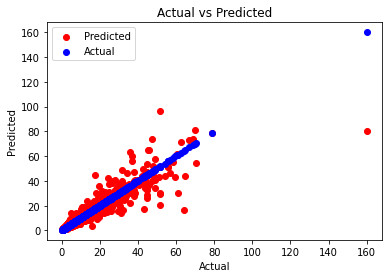

In [118]:
import matplotlib.pyplot as plt

df = pd.DataFrame({'Actual': y_test['Price'], 'Predicted': y_pred_inverse_transformed})

plt.scatter(df['Actual'], df['Predicted'], c='red', label='Predicted')
plt.scatter(df['Actual'], df['Actual'], c='blue', label='Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.legend(loc='best')
plt.show()

In [119]:
print("X train: ",X_train.shape)
print("X test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

X train:  (4212, 53)
X test:  (1806, 53)
y train:  (4212, 2)
y test:  (1806, 2)


In Ols model, there were values with Pvalue < 0.05 existing. So dropped them as below.

In [120]:
X_train = X_train.drop(['Location_Chennai','Location_Kochi','Location_Mumbai','Location_Pune','Fuel_Type_LPG','Fuel_Type_Petrol','Owner_Type_Fourth & Above','brand_Bentley','brand_Force','brand_Jeep','brand_Porsche','brand_Smart','brand_Toyota','brand_Lamborghini','brand_Mitsubishi'], axis = 1)

X_test = X_test.drop(['Location_Chennai','Location_Kochi','Location_Mumbai','Location_Pune','Fuel_Type_LPG','Fuel_Type_Petrol','Owner_Type_Fourth & Above','brand_Bentley','brand_Force','brand_Jeep','brand_Porsche','brand_Smart','brand_Toyota','brand_Lamborghini','brand_Mitsubishi'], axis = 1)

In [121]:
print("X train: ",X_train.shape)
print("X test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

X train:  (4212, 38)
X test:  (1806, 38)
y train:  (4212, 2)
y test:  (1806, 2)


**Important variables of Linear Regression**

In [122]:
# Import Statsmodels 
import statsmodels.api as sm

# Statsmodel api does not add a constant by default. We need to add it explicitly
x_train = sm.add_constant(X_train)

# Add constant to test data
x_test = sm.add_constant(X_test)

def build_ols_model(train):
    
    # Create the model
    olsmodel = sm.OLS(y_train["price_log"], train)      
    
    return olsmodel.fit()


# Fit linear model on new dataset
olsmodel1 = build_ols_model(x_train)

print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     1360.
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        19:57:14   Log-Likelihood:                 68.395
No. Observations:                4212   AIC:                            -58.79
Df Residuals:                    4173   BIC:                             188.7
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -237.93

In [123]:
#get_model_score(olsmodel1)
#The above code does not work with x_train. 
#It can work with X_train. But We want to see it with x_train that is including the constant.


In [124]:
# Retrive Coeff values, p-values and store them in the dataframe
olsmod = pd.DataFrame(olsmodel1.params, columns = ['coef'])

olsmod['pval'] = olsmodel1.pvalues

In [125]:
# Filter by significant p-value (pval <= 0.05) and sort descending by Odds ratio

olsmod = olsmod.sort_values(by = "pval", ascending = False)

pval_filter = olsmod['pval']<= 0.05

olsmod[pval_filter]

,coef,pval
Location_Delhi,-0.030928,2.234086e-02
brand_Volvo,0.165977,8.679445e-03
brand_ISUZU,-0.412204,3.153760e-03
Location_Jaipur,-0.046100,2.844555e-03
Owner_Type_Third,-0.116982,2.125116e-05
Fuel_Type_Electric,1.102157,4.592496e-06
Owner_Type_Second,-0.058482,5.846103e-08
brand_Skoda,-0.147028,4.689244e-08
Engine,0.000131,2.830593e-11
brand_Jaguar,0.334956,1.827377e-11


In [126]:
# We are looking are overall significant varaible

pval_filter = olsmod['pval']<= 0.05
mp_vars = olsmod[pval_filter].index.tolist()

# We are going to get overall varaibles (un-one-hot encoded varables) from categorical varaibles
sig_var = []
for col in mp_vars:
    if '' in col:
        first_part = col.split('_')[0]
        for c in cars_data.columns:
            if first_part in c and c not in sig_var :
                sig_var.append(c)

                
start = '\033[1m'
end = '\033[95m'
print(start+ 'Most overall significant categorical varaibles of LINEAR REGRESSION  are ' +end,':\n', sig_var)

Most overall significant categorical varaibles of LINEAR REGRESSION  are  :
 ['Location', 'brand', 'brand_model', 'Owner_Type', 'Fuel_Type', 'Engine', 'Seats', 'kilometers_driven_log', 'Mileage', 'Transmission', 'Power', 'Year']


**Check VIF**

In [127]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # Calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


print(checking_vif(x_train))

                  feature            VIF
0                   const  792897.495931
1                    Year       2.082445
2                 Mileage       2.869668
3                  Engine      10.449146
4                   Power       8.683474
5                   Seats       2.279979
6   kilometers_driven_log       1.699706
7      Location_Bangalore       1.091347
8     Location_Coimbatore       1.166947
9          Location_Delhi       1.109396
10     Location_Hyderabad       1.175431
11        Location_Jaipur       1.107201
12       Location_Kolkata       1.151368
13       Fuel_Type_Diesel       2.281868
14     Fuel_Type_Electric       1.008220
15    Transmission_Manual       2.206912
16      Owner_Type_Second       1.168416
17       Owner_Type_Third       1.112434
18             brand_Audi       1.968643
19              brand_BMW       2.339993
20        brand_Chevrolet       1.417824
21           brand_Datsun       1.066843
22             brand_Fiat       1.109889
23             b

After checking VIF, I was thinking to drop 'Engine' since there may be multicollinearity between 'Engine' and 'Power'. However, according to my test, that I compared 2 noteboks if the result will be changed when I drop 'Engine', it was not really big different outcome of the data including 'Engine' and the data without 'Engine'. So, I decided to keep the variable 'Engine'.   
And I read an article, if there is enough amount of data, then it is much better to use 2 datas with same kind of correlation each other in order to perform more accuate prediction. This is because even if the 2 datas looks same correlations but each data has difference aspect and infomation. The defference is important to have accurate results. If we drop 1 of the 2 datas, then we never have the unique information from the data with dropped. 

**Checking the below linear regression assumptions**  

**1, Mean of residuals should be 0**  
**2, No Heteroscedasticity**  
**3, Linearity of variables**  
**4, Normality of error terms**  

1. Check for mean residuals

In [128]:
residuals = olsmodel1.resid

np.mean(residuals)

-6.123452488977132e-13

The mean of residuals is almost 0. It's not 0 but it is very close. So, the linear regression assumption is fullfiled.  

2. Check for homoscedasticity

In [129]:
from statsmodels.stats.diagnostic import het_white

from statsmodels.compat import lzip

import statsmodels.stats.api as sms

In [130]:
name = ["F statistic", "p-value"]

test = sms.het_goldfeldquandt(y_train["price_log"], x_train)

lzip(name, test)

[('F statistic', 1.1402582235441712), ('p-value', 0.00142882140537981)]

As a result of the test, p-value is 0.00142882140537981. It is less than 0.05.Hence, it fails to reject the null-hypothesis. This means the residuals are homoscedastic.

3. Linearity of variables

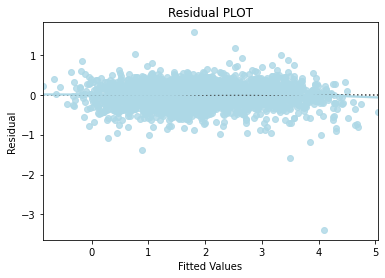

In [131]:
# Predicted values
fitted = olsmodel1.fittedvalues

# sns.set_style("whitegrid")
sns.residplot(x = fitted, y = residuals, color = "lightblue", lowess = True)

plt.xlabel("Fitted Values")

plt.ylabel("Residual")

plt.title("Residual PLOT")

plt.show()

Through our observation, overall they are randomlly distribute. In summary it is no pattern between the residual and fitted values in scatter plot. The linearity assumption is fullfiled.

4. Normality of error terms

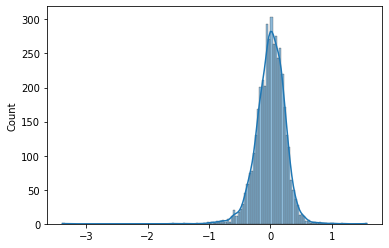

In [132]:
# Plot histogram of residuals

sns.histplot(residuals, kde = True)

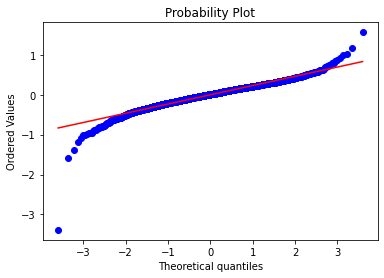

In [133]:
# Plot q-q plot of residuals
import pylab

import scipy.stats as stats

stats.probplot(residuals, dist = "norm", plot = pylab)

plt.show()

We can see that the error terms are normally distributed. In q-q plot of residuals, most of the points lying on the red line. Some of points far from the red line. They are the errors which are not included in normal distribution.
The assumption of normality is satisfied.　

**Build Ridge / Lasso Regression similar to Linear Regression:**<br>

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [134]:
# Import Ridge/ Lasso Regression from sklearn
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt


In [135]:
# Create a Ridge regression model

rr = Ridge(alpha=1.5)

# Fit Ridge regression model
rr.fit(X_train, y_train['price_log']) 

# Get score of the model
ridge_score = get_model_score(rr)

R-square on training set :  0.8525667303455289
R-square on test set :  0.860248336810246
RMSE on training set :  4.289918255151504
RMSE on test set :  4.166370905926495


In [136]:
# Create a Lasso regression model

model_lasso = Lasso(alpha=0.000005)

# Fit Lasso regression model
model_lasso.fit(X_train, y_train['price_log']) 

# Get score of the model
lasso_score = get_model_score(model_lasso)

R-square on training set :  0.8542115033863948
R-square on test set :  0.8620625729038892
RMSE on training set :  4.265921868299146
RMSE on test set :  4.139238947017211


**Observations from results:   
Ridge:   
All score are very similar result of Linear Regression.
R-square on training set is 85% which is high.  
R-square on test set is 86% that is almost same result of the R-square on training set.  This is very good balance!  
RMSE on training set 4.28 is high.  
RMSE on testing set 4.16 is a slightly lower than the RMSE on training set.       


Lasso:   
R-square on training set is 85% which is low.   
R-square on test set is 86% that is very close to the R-square on training set. That means it is a good balance.   
RMSE on training set 4.2 is high.    
RMSE on testing set 4.13 is a slightly higher than the RMSE on training set.       




**

**KNN**

In [137]:
from sklearn.neighbors import KNeighborsRegressor

In [138]:
#building the model
knn = KNeighborsRegressor()
#fit the model
knn.fit(X_train, y_train['price_log'])
knn_score = get_model_score(knn)



R-square on training set :  0.8859570322979387
R-square on test set :  0.8102349500843335
RMSE on training set :  3.772988863677308
RMSE on test set :  4.854981191840323


**Observations from results:      
R-square on training set is 88% which is pretty high.    
R-square on test set is 81% that is generally high but lower than the training set's one.7% difference indicates it is overfitting.     
RMSE on training set 3.7 is high.   
RMSE on training set 4.8 is higher than the RMSE on training set. 

We are going to tune the KNN as below.

**Tuning for KNN**

In [139]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold

# List Hyperparameters that we want to tune
leaf_size = list(range(1,5))
n_neighbors = list(range(1,10))
p=[1,2]

# Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

# Create new KNN object
knn = KNeighborsRegressor()

# Use GridSearch with 5-fold cross validation
kf = KFold(n_splits=5, shuffle=True, random_state=0)
knn = GridSearchCV(knn, hyperparameters, cv=kf)

# Fit the model
knn_model = knn.fit(X_train, y_train['price_log'])

# Get model score
knn_score = get_model_score(knn)



R-square on training set :  0.9343022434143974
R-square on test set :  0.8271851866996583
RMSE on training set :  2.863693528465089
RMSE on test set :  4.633081293386861


Tried to tune KNN to improve overfitting.   
R-square on trainig set rised to 0.93 from 0.88 while R-square on test set was not much changed which is staying 0.81 and 0.82
There was same tendacy in RMSE as well.  
RMSE on training set was improved from 3.7 to 2.8 but RMSE on test set was not much change.   
  

### **Decision Tree** 

https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html

In [140]:

# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

import sys
from sklearn.metrics import accuracy_score
import pylab as pl

In [141]:
# Create a decision tree regression model, use random_state = 1
#dtree = _____
dtree = DecisionTreeRegressor(random_state=1)


In [142]:
# Fit decision tree regression model
dtree.fit(X_train, y_train['price_log'])


DecisionTreeRegressor(random_state=1)

In [143]:
# Get score of the model
Dtree_model = get_model_score(dtree) 
#dtree.score(X_test, y_test)


R-square on training set :  0.9999965696959578
R-square on test set :  0.7893263020840783
RMSE on training set :  0.02069271973944705
RMSE on test set :  5.115458862271441


**Observations from results:    
R-square on training set is 99% which is almost 100%.  
R-square on test set is 78% that is generally high but lower than the training set's one. When test score is lower than training score, there are meaningful differences between training data and test data. It is very overfitting.   
RMSE on training set 0.02 is very low. It is good that lower is better. O is the best.
RMSE on training set 5.11 is too high compared to the RMSE on training set. 

**

In [144]:
y_pred = dtree.predict(X_test)

dtree_reg_y = np.exp(y_pred)

dtree_reg_y

array([ 9.23      ,  4.25      , 32.99999998, ..., 10.49      ,
       16.75      , 11.97000001])

In [145]:
df = pd.DataFrame({'Actual':y_test['Price'], 'predicted':dtree_reg_y})
df

,Actual,predicted
3766,9.43,9.23
3625,3.56,4.25
1683,34.78,33.00
3283,1.25,1.30
79,1.30,1.93
...,...,...
1697,3.25,4.05
188,4.60,4.28
2498,10.49,10.49
3886,19.50,16.75


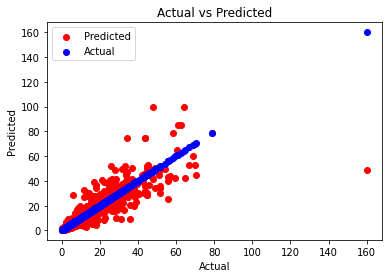

In [146]:


df = pd.DataFrame({'Actual': y_test['Price'], 'Predicted': dtree_reg_y})

plt.scatter(df['Actual'], df['Predicted'], c='red', label='Predicted')
plt.scatter(df['Actual'], df['Actual'], c='blue', label='Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.legend(loc='best')
plt.show()

Print the importance of features in the tree building. The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance.


In [147]:
print(pd.DataFrame(dtree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                            Imp
Power                  0.634730
Year                   0.234185
Engine                 0.032561
kilometers_driven_log  0.020499
Mileage                0.014361
brand_Tata             0.006303
Location_Kolkata       0.005114
Transmission_Manual    0.004517
brand_Land Rover       0.003843
brand_Audi             0.003508
brand_Mahindra         0.003501
Seats                  0.003369
brand_Mini Cooper      0.003326
brand_Honda            0.002964
Location_Hyderabad     0.002947
Fuel_Type_Diesel       0.002526
Location_Coimbatore    0.002237
brand_Hyundai          0.002037
brand_Volkswagen       0.001982
Owner_Type_Second      0.001907
Location_Delhi         0.001893
Location_Jaipur        0.001818
Location_Bangalore     0.001710
Owner_Type_Third       0.001576
brand_Mercedes-Benz    0.001348
brand_Maruti           0.001122
brand_Chevrolet        0.000996
brand_Skoda            0.000916
Fuel_Type_Electric     0.000740
brand_Ford             0.000723
brand_BM

**Observations and insights:    
-Power is the most impact in the feature.    
-Year is 2nd impact in the feature.   
-Engine is 3rd impact in the feature.  




**

Text(0.5, 1.0, 'Feature Importance of Decision Tree')

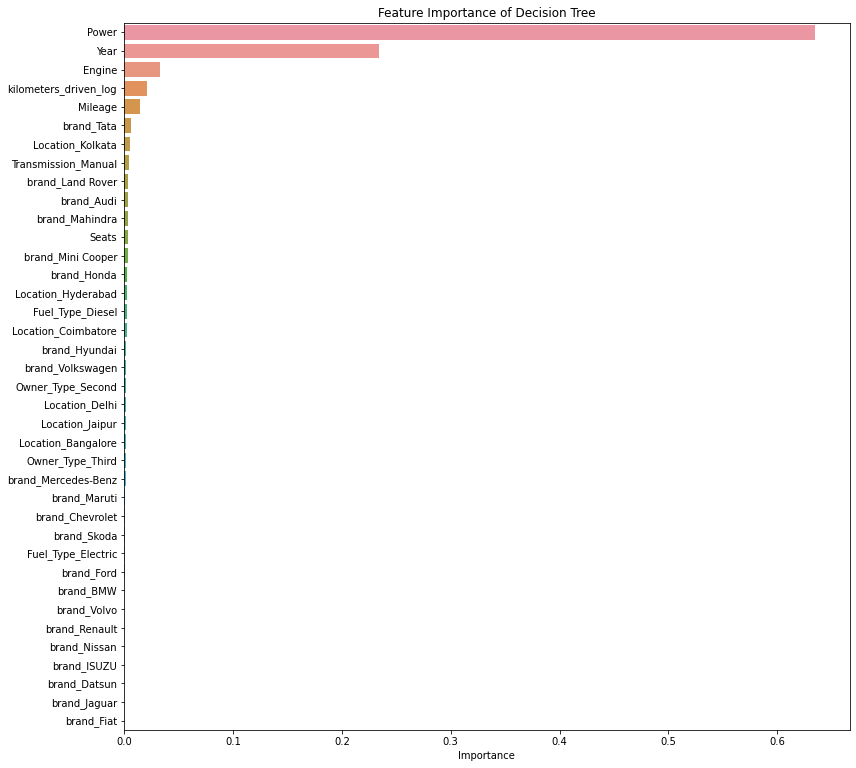

In [148]:
importances = dtree.feature_importances_

columns = X_train.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance, importance_df.index)

plt.title("Feature Importance of Decision Tree")

### **Random Forest**

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [149]:
# Import Randomforest for Regression from sklearn


from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

# calculating different regression metrics

from sklearn.model_selection import GridSearchCV

In [150]:
# Create a Randomforest regression model 

RF = RandomForestRegressor(n_estimators=100)

In [151]:
# Fit Randomforest regression model
RF.fit(X_train,y_train['price_log'])


RandomForestRegressor()

In [152]:
# Get score of the model

RF_model = get_model_score(RF)

R-square on training set :  0.9716776580282699
R-square on test set :  0.8759378415254512
RMSE on training set :  1.880251090958959
RMSE on test set :  3.9255372583894435


**Observations and insights: 

R-square on training set is 97% which is very high that is close to perfect.   
R-square on test set is 87% that is high. It is significanly lower score than training set's one. It is very overfitting.  
RMSE on training set 1.79 is relatively low.    
RMSE on testing set 3.9 is higher than the RMSE on training set.  


**

**Feature Importance**

In [153]:
# Print important features similar to decision trees
print(pd.DataFrame(RF.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))



                            Imp
Power                  0.632857
Year                   0.234413
Engine                 0.031195
kilometers_driven_log  0.020956
Mileage                0.016914
Location_Kolkata       0.005283
Transmission_Manual    0.005155
brand_Tata             0.005020
Seats                  0.004228
brand_Honda            0.003905
brand_Mahindra         0.003443
Location_Hyderabad     0.003113
brand_Mini Cooper      0.002887
Fuel_Type_Diesel       0.002793
brand_Mercedes-Benz    0.002717
brand_Audi             0.002604
Location_Coimbatore    0.002585
brand_Skoda            0.002494
Owner_Type_Second      0.002040
Location_Bangalore     0.001720
Location_Delhi         0.001599
brand_Land Rover       0.001473
brand_Volkswagen       0.001394
brand_Hyundai          0.001371
Location_Jaipur        0.001356
brand_Chevrolet        0.001349
brand_Maruti           0.001348
Owner_Type_Third       0.001228
brand_Ford             0.000608
brand_BMW              0.000565
Fuel_Typ

**Observations and insights:    
-Power is the most impact in the feature.  
-Year is 2nd impact in the feature.  
-Engine is 3rd impact in the feature.   
  **

Text(0.5, 1.0, 'Feature Importance of Random Forest')

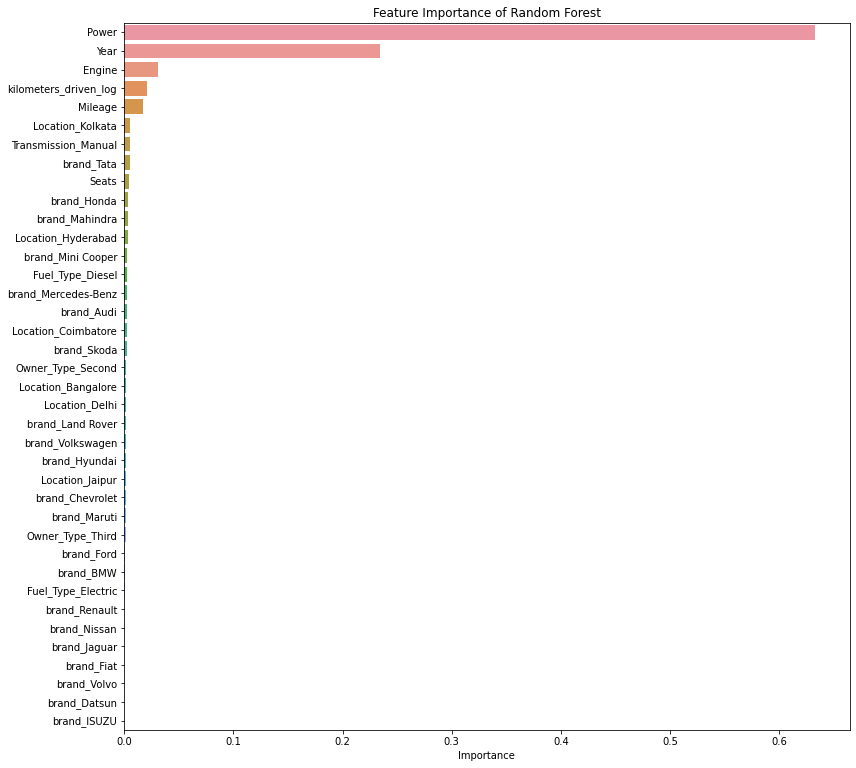

In [154]:
importances = RF.feature_importances_

columns = X_train.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance, importance_df.index)

plt.title("Feature Importance of Random Forest")

### **Hyperparameter Tuning: Decision Tree**



In [155]:
#importing required libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, make_scorer


# Choose the type of estimator 
dtree_tuned = DecisionTreeRegressor(random_state = 1)

# Grid of parameters to choose from
# Check documentation for all the parametrs that the model takes and play with those


parameters = {'splitter':["best","random"],'max_depth': [1, 3, 5],'min_samples_leaf': [5], 'min_samples_split':[2] 
    }  

# Type of scoring used to compare parameter combinations
scorer = 'neg_mean_squared_error'

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring = scorer, cv = 10)
grid_obj = grid_obj.fit(X_train,y_train['price_log'])

# Set the model to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
dtree_tuned.fit(X_train,y_train['price_log'])

DecisionTreeRegressor(max_depth=5, min_samples_leaf=5, random_state=1)

In [156]:
# Get score of the dtree_tuned

Dtree_model_tuned = get_model_score(dtree_tuned)

R-square on training set :  0.8182963582746533
R-square on test set :  0.7817724989991125
RMSE on training set :  4.76247911303812
RMSE on test set :  5.2063597886966795


**Observations and insights:     
After tuning of Decision Tree, overall the scores became significanly lower in R-square. On the other hand, RMSE rised up.   
R-square on training set is 81% which is sufficient for correlation.   
R-square on test set is 78% that is sufficient for the evaluation.    
It is about 3% lower score than training set's one. It a little overfitting but I assume it is sufficient.    
RMSE on training set 4.7 is kind of high.  
RMSE on testing set 5.20 is higher than the RMSE on training set.  

For tuning, added:   
'max_depth': [1, 3, 5] to reduce the overfitting. Less depth provides less overfitting.  
'min_samples_leaf': [5]  to reduce the overfitting. Setting large number in the minimum number of samples of leaf provides less overfitting.  
'min_samples_split':[2] to reduce the overfitting. Setting large number in the minimum number of samples of the split provides less overfitting.  


   
**  

**Feature Importance**

In [157]:
# Print important features of tuned decision tree similar to decision trees

print(pd.DataFrame(dtree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))


                            Imp
Power                  0.721828
Year                   0.243317
Engine                 0.015360
Transmission_Manual    0.004496
brand_Tata             0.004448
brand_Audi             0.002947
brand_Honda            0.002785
kilometers_driven_log  0.002587
Seats                  0.001465
brand_Mahindra         0.000768
brand_Volkswagen       0.000000
brand_Skoda            0.000000
brand_Renault          0.000000
brand_Nissan           0.000000
brand_Ford             0.000000
brand_Mercedes-Benz    0.000000
brand_Maruti           0.000000
brand_Land Rover       0.000000
brand_Jaguar           0.000000
brand_ISUZU            0.000000
brand_Hyundai          0.000000
brand_Mini Cooper      0.000000
brand_Chevrolet        0.000000
brand_Fiat             0.000000
brand_Datsun           0.000000
Mileage                0.000000
brand_BMW              0.000000
Owner_Type_Third       0.000000
Owner_Type_Second      0.000000
Fuel_Type_Electric     0.000000
Fuel_Typ

**Observations and insights:     
-Power is the most impact in the feature.  
-Year is 2nd impact in the feature.  
-Engine is 3rd impact in the feature.  


**

Text(0.5, 1.0, 'Feature Importances of Hyperparameter Tuning: Decision Tree')

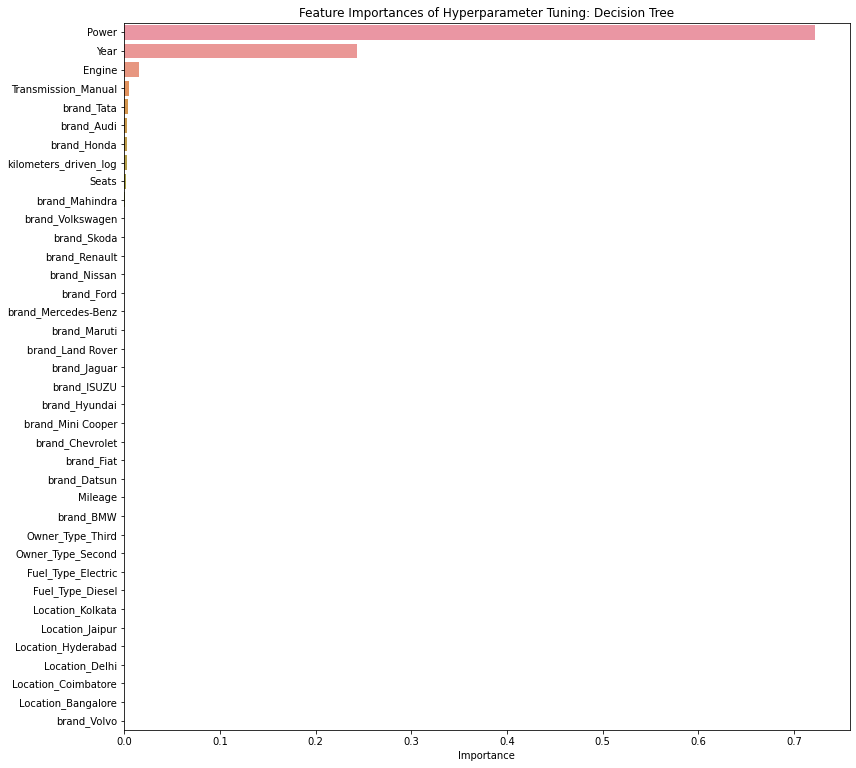

In [158]:
importances = dtree_tuned.feature_importances_

columns = X_train.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance, importance_df.index)

plt.title("Feature Importances of Hyperparameter Tuning: Decision Tree")

### **Hyperparameter Tuning: Random Forest**

In [159]:
from sklearn.model_selection import GridSearchCV

# Choose the type of Regressor
randomforest_tuned = RandomForestRegressor(random_state=1)

# Define the parameters for Grid to choose from 
# Check documentation for all the parametrs that the model takes and play with those
parameters={'n_estimators': [20], 'max_depth': [5, 10, 50, None], 'min_samples_leaf': [5, 10, 20, 25], 'max_features':['log2', 'auto']
  }

# Type of scoring used to compare parameter combinations
scorer = 'neg_mean_squared_error'

# Run the grid search
grid_obj = GridSearchCV(estimator=randomforest_tuned,param_grid=parameters,
               cv=5, verbose=1, scoring = scorer)
grid_obj = grid_obj.fit(X_train,y_train['price_log'])


# Set the model to the best combination of parameters
randomforest_tuned=grid_obj.best_estimator_

# Fit the best algorithm to the data
randomforest_tuned.fit(X_train,y_train['price_log'])



Fitting 5 folds for each of 32 candidates, totalling 160 fits


RandomForestRegressor(max_depth=50, min_samples_leaf=5, n_estimators=20,
                      random_state=1)

In [160]:
# Get score of the model

randomforest_tuned_model = get_model_score(randomforest_tuned)

R-square on training set :  0.9265681876867194
R-square on test set :  0.8490987360667573
RMSE on training set :  3.027564412016749
RMSE on test set :  4.329381689015134


**Observations and insights:      
After tuning of Radom Forest, overall the scores became significanly lower in R-square. On the other hand, RMSE rised up.   
R-square on training set is 92% which is relatively high.    
R-square on test set is 84% that is sufficient for the evaluation. It is about 8% lower score than training set's one.    
RMSE on training set 3.02 is good.     
RMSE on testing set 4.33 is higher than the RMSE on training set.   
It is overfitting.   
    

**

**Feature Importance**

In [161]:
# Print important features of tuned decision tree similar to decision trees

print(pd.DataFrame(randomforest_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                            Imp
Power                  0.657426
Year                   0.245260
Engine                 0.030501
kilometers_driven_log  0.013842
Mileage                0.013645
Transmission_Manual    0.004596
Location_Kolkata       0.004229
Seats                  0.003642
brand_Honda            0.003601
Fuel_Type_Diesel       0.003372
brand_Mahindra         0.002831
brand_Mercedes-Benz    0.002663
brand_Tata             0.002412
Location_Hyderabad     0.002348
brand_Audi             0.002275
Location_Coimbatore    0.001197
brand_Maruti           0.000946
Owner_Type_Second      0.000662
Location_Delhi         0.000659
Location_Jaipur        0.000597
brand_Hyundai          0.000576
brand_BMW              0.000564
Location_Bangalore     0.000468
brand_Skoda            0.000416
Owner_Type_Third       0.000365
brand_Chevrolet        0.000300
brand_Land Rover       0.000215
brand_Ford             0.000157
brand_Volkswagen       0.000135
brand_Renault          0.000059
brand_Ni

**Observations and insights:  
-Power is the most impact in the feature as 0.657.   
-Year is 2nd impact in the feature.   
-Engine is 3rd impact in the feature.    
 




**

Text(0.5, 1.0, 'Feature Importances of Hyperparameter Tuning: Random Forest')

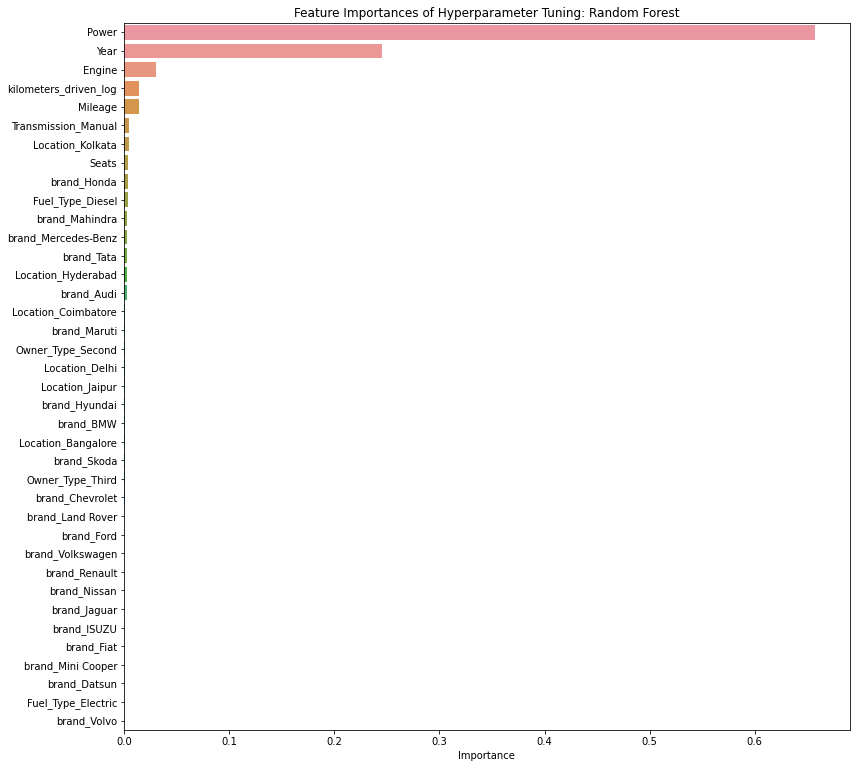

In [162]:
importances = randomforest_tuned.feature_importances_

columns = X_train.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance, importance_df.index)

plt.title("Feature Importances of Hyperparameter Tuning: Random Forest")

**XG Boost**

In [163]:
# Installing the xgboost library using the 'pip' command.
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [164]:
import xgboost as xgb

In [165]:
from xgboost import XGBRegressor

# define model
xgb_model = XGBRegressor()

# Fitting the model
xgb_model.fit(X_train, y_train['price_log'])

# Model Performance on the test data
agb_score = get_model_score(xgb_model)

[19:58:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R-square on training set :  0.9122696987771628
R-square on test set :  0.8921774083756588
RMSE on training set :  3.3092233377662255
RMSE on test set :  3.6596059113818087


Text(0.5, 1.0, 'Feature Importances of XGBoost')

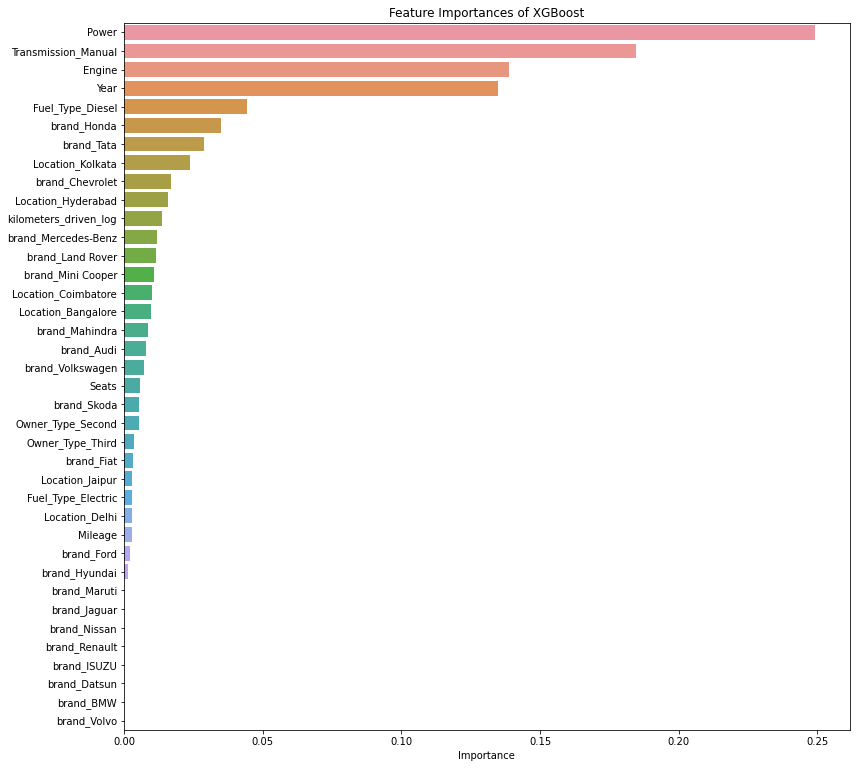

In [166]:
importances = xgb_model.feature_importances_

columns = X_train.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance, importance_df.index)

plt.title("Feature Importances of XGBoost")

The all score of XGBoost and the balance is pretty good.  
It is not overfitting between 0.91 and 0.89. And the range is pretty high.  
RSME is relatively lower than other models.  
R-square:train data: 0.91  
R-square:test data: 0.89  
RSME: train data: 3.3  
RSME:test data: 3.6  
The Feature importance of XGBoost is very different from other models such as decision tree, random forest, and tuned decision tree.   
Other models have the order is 1st:Power, 2nd:Year, and 3rd Engine.   
However, XG Boost has the order 1st:Power, 2nd:Transmission_Manual, 3rd:Engine, and 4th: Year.
Probably, it can do boost well which is minimizing loss a lot and has a weakness of sensitivity to outliers, these are why the features are different from other models.  

In [167]:
# Predict on test data
xgb_reg_y_pred = xgb_model.predict(X_test)

# Convert log values back to original values
xgb_reg_y_pred = np.exp(xgb_reg_y_pred)


# Compare actual and predicted prices
df = pd.DataFrame({'Actual': y_test['Price'], 'Predicted': xgb_reg_y_pred})
print(df)

      Actual  Predicted
3766    9.43   6.135054
3625    3.56   4.299294
1683   34.78  33.757072
3283    1.25   1.057084
79      1.30   1.159450
...      ...        ...
1697    3.25   3.896150
188     4.60   4.892074
2498   10.49   8.541569
3886   19.50  19.646526
5608   10.11   9.731228

[1806 rows x 2 columns]


In [168]:
df['Difference'] = df['Actual'] - df['Predicted']

In [169]:
df

,Actual,Predicted,Difference
3766,9.43,6.135054,3.294946
3625,3.56,4.299294,-0.739294
1683,34.78,33.757072,1.022928
3283,1.25,1.057084,0.192916
79,1.30,1.159450,0.140550
...,...,...,...
1697,3.25,3.896150,-0.646150
188,4.60,4.892074,-0.292074
2498,10.49,8.541569,1.948431
3886,19.50,19.646526,-0.146526


In [170]:
df.max(axis=0)

Actual        160.000000
Predicted      76.705063
Difference     83.294937
dtype: float64

In [171]:
df['Difference'] = df['Actual'] - df['Predicted']
df['Squared Difference'] = df['Difference']*df['Difference']

df

,Actual,Predicted,Difference,Squared Difference
3766,9.43,6.135054,3.294946,10.856668
3625,3.56,4.299294,-0.739294,0.546555
1683,34.78,33.757072,1.022928,1.046381
3283,1.25,1.057084,0.192916,0.037217
79,1.30,1.159450,0.140550,0.019754
...,...,...,...,...
1697,3.25,3.896150,-0.646150,0.417510
188,4.60,4.892074,-0.292074,0.085307
2498,10.49,8.541569,1.948431,3.796384
3886,19.50,19.646526,-0.146526,0.021470


In [172]:
import numpy as np

df['Difference'] = df['Actual'] - df['Predicted']
df['Squared Difference'] = df['Difference']*df['Difference']

squared_diff_mean = df['Squared Difference'].mean()
rmse = np.sqrt(squared_diff_mean)

print("The Root Mean Squared Error (RMSE) is: ", rmse)

The Root Mean Squared Error (RMSE) is:  3.6596059113818087


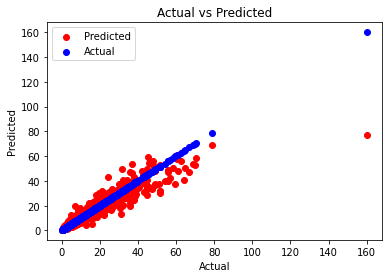

In [173]:
import matplotlib.pyplot as plt

df = pd.DataFrame({'Actual': y_test['Price'], 'Predicted': xgb_reg_y_pred})

plt.scatter(df['Actual'], df['Predicted'], c='red', label='Predicted')
plt.scatter(df['Actual'], df['Actual'], c='blue', label='Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.legend(loc='best')
plt.show()

**AdaBoost for Decision Tree**

In [174]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV
from sklearn import tree
import numpy as np

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error


In [175]:
crossvalidation=KFold(n_splits  = 10, shuffle = True, random_state = 1)
for depth in range (1,10):
    tree_regressor = tree.DecisionTreeRegressor(max_depth=depth, random_state = 1)
    if tree_regressor.fit(X_train, y_train['price_log']).tree_.max_depth<depth:
        break
    score = np.mean(cross_val_score(tree_regressor,X_train,y_train['price_log'],scoring = 'neg_mean_squared_error',
                                    cv = crossvalidation, n_jobs =1))
    print(depth, score)

1 -0.3981002528578569
2 -0.2696783198148081
3 -0.1952043349816756
4 -0.15154837565242663
5 -0.12025523721551708
6 -0.10006802987584154
7 -0.10061884061381195
8 -0.0931823112501818
9 -0.09806495715903091


In [176]:

# define model
ada_regr = AdaBoostRegressor (random_state= 0) 

# define hyperparameters to tune
search_grid = {'n_estimators': [500, 1000, 2000], 
              'learning_rate': [0.001, 0.01, 1], 'random_state':[1]}

# create a grid search object using 5-fold cross-validation
grid_search = GridSearchCV(estimator = ada_regr, param_grid = search_grid, 
                           scoring = 'neg_mean_squared_error', cv = crossvalidation, n_jobs =1)


In [177]:
# fit the grid search
grid_search.fit(X_train, y_train['price_log'])
print(grid_search.best_params_)
print(grid_search.best_score_)
ada_score = get_model_score(grid_search)

{'learning_rate': 1, 'n_estimators': 500, 'random_state': 1}
-0.12394670635622422
R-square on training set :  0.7450151292872985
R-square on test set :  0.6900304704272826
RMSE on training set :  5.641680331758796
RMSE on test set :  6.2049593312513185


In [178]:
ada_regr = AdaBoostRegressor(n_estimators = 500, learning_rate = 1, random_state = 1) 
score = np.mean(cross_val_score(ada_regr,X_train, y_train['price_log'],scoring = 'neg_mean_squared_error',
                                cv = crossvalidation, n_jobs = 1))                           

# Model Performance on the test data
score

-0.12394670635622422

**GradientBoost**

In [179]:
from sklearn.ensemble import GradientBoostingRegressor
# define model
gradient_reg = GradientBoostingRegressor(random_state=0)
parameters={'n_estimators': [10], 'max_bin': [1, 10, 100, None],'num_leaves':[10,100,1000],'min_samples_leaf': [100, 1000, 10000, 100000], 'max_features':[None]
  }
# Fitting the model
gradient_reg.fit(X_train, y_train['price_log'])
GradientBoostingRegressor(random_state=0)

search_grid = {'n_estimators': [5000, 10000, 20000], 
              'learning_rate': [0.00001, 0.0001, 1], 'num_iterations': [1000, 10000, 100000], 'random_state':[1]}

# Model Performance on the test data

gradient_score = get_model_score(gradient_reg)

R-square on training set :  0.9222274702271017
R-square on test set :  0.8952832514524116
RMSE on training set :  3.1157627518157125
RMSE on test set :  3.606513081031055


Text(0.5, 1.0, 'Feature Importances of GradientBoost')

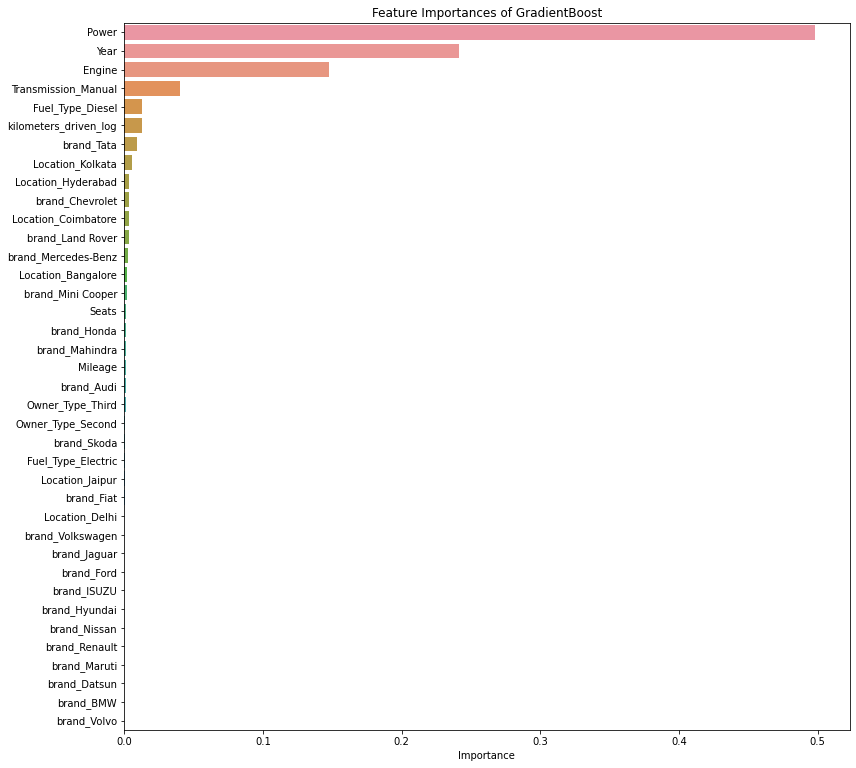

In [180]:
importances = gradient_reg.feature_importances_

columns = X_train.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance, importance_df.index)

plt.title("Feature Importances of GradientBoost")

Gradient Boost has a balanced score which is the difference of R2 between test set and train set are approximately 0.03.   
The difference of RSME between train set and  test set are about 0.6.   
Train_R2: 0.92  
Test_R2: 0.89  
Train_RSME:3.1   
Test_RSME:3.6  
Compared to other models, these scores are really balanced and good.  
Also, the order of feature importance are between XGBoost and other regressions. That is also good for prediction. This is because Gradient Boost is robust to outliers. On the other hand, XGBoost is sensitive to outliers.  Compared to XGBoost, the order of feature importance is not different from other regressions.  
  

 

In [181]:
# Predict on test data
gradient_reg_y_pred = gradient_reg.predict(X_test)

# Convert log values back to original values
gradient_reg_y_pred = np.exp(gradient_reg_y_pred)

# Store actual used car prices
#actual_prices = np.exp(y_test['price_log'].to_numpy())

# Compare actual and predicted prices
df = pd.DataFrame({'Actual': y_test['Price'], 'Predicted': gradient_reg_y_pred})
print(df)

      Actual  Predicted
3766    9.43   6.143618
3625    3.56   4.417155
1683   34.78  32.626361
3283    1.25   1.104917
79      1.30   1.217785
...      ...        ...
1697    3.25   3.916597
188     4.60   4.881439
2498   10.49   8.531902
3886   19.50  19.587852
5608   10.11   9.692713

[1806 rows x 2 columns]


In [182]:
df['Difference'] = df['Actual'] - df['Predicted']

In [183]:
df['Difference'] = df['Actual'] - df['Predicted']
df['Squared Difference'] = df['Difference']*df['Difference']

df

,Actual,Predicted,Difference,Squared Difference
3766,9.43,6.143618,3.286382,10.800308
3625,3.56,4.417155,-0.857155,0.734714
1683,34.78,32.626361,2.153639,4.638163
3283,1.25,1.104917,0.145083,0.021049
79,1.30,1.217785,0.082215,0.006759
...,...,...,...,...
1697,3.25,3.916597,-0.666597,0.444352
188,4.60,4.881439,-0.281439,0.079208
2498,10.49,8.531902,1.958098,3.834146
3886,19.50,19.587852,-0.087852,0.007718


In [184]:
import numpy as np

squared_diff_mean = df['Squared Difference'].mean()
rmse = np.sqrt(squared_diff_mean)

print("The Root Mean Squared Error (RMSE) is: ", rmse)

The Root Mean Squared Error (RMSE) is:  3.606513081031055


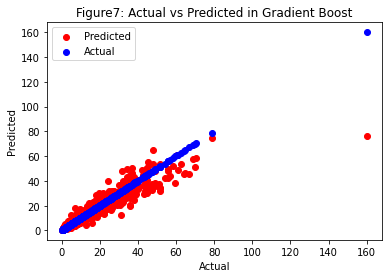

In [185]:
import matplotlib.pyplot as plt

df = pd.DataFrame({'Actual': y_test['Price'], 'Predicted': gradient_reg_y_pred})

plt.scatter(df['Actual'], df['Predicted'], c='red', label='Predicted')
plt.scatter(df['Actual'], df['Actual'], c='blue', label='Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Figure7: Actual vs Predicted in Gradient Boost')
plt.legend(loc='best')
plt.show()


**CatBoost**

In [186]:
!pip install catboost

from catboost import CatBoostRegressor

model = CatBoostRegressor(iterations=18,
                          learning_rate=0.3,
                          depth=6)
# Fit model
model.fit(X_train, y_train['price_log'])

# Get predictions

CatBoostRegressor(random_state=0)

# Model Performance on the test data
catboost_score = get_model_score(model)



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
0:	learn: 0.6966228	total: 48.9ms	remaining: 832ms
1:	learn: 0.5600276	total: 51.2ms	remaining: 410ms
2:	learn: 0.4679438	total: 52.7ms	remaining: 264ms
3:	learn: 0.4014160	total: 54.2ms	remaining: 190ms
4:	learn: 0.3611451	total: 55.9ms	remaining: 145ms
5:	learn: 0.3290860	total: 57.6ms	remaining: 115ms
6:	learn: 0.3061743	total: 60.6ms	remaining: 95.2ms
7:	learn: 0.2897566	total: 62.6ms	remaining: 78.2ms
8:	learn: 0.2791672	total: 64.3ms	remaining: 64.3ms
9:	learn: 0.2691895	total: 65.9ms	remaining: 52.8ms
10:	learn: 0.2621190	total: 67.4ms	remaining: 42.9ms
11:	learn: 0.2543588	total: 68.9ms	remaining: 34.4ms
12:	learn: 0.2498736	total: 70.4ms	remaining: 27.1ms
13:	learn: 0.2445495	total: 72ms	remaining: 20.6ms
14:	learn: 0.2408552	total: 73.4ms	remaining: 14.7ms
15:	learn: 0.2376888	total: 74.7ms	remaining: 9.34ms
16:	learn: 0.2336384	total: 76ms	remaining: 4.47ms
17:	learn: 0.2307896

Text(0.5, 1.0, 'Feature Importances of CatBoost')

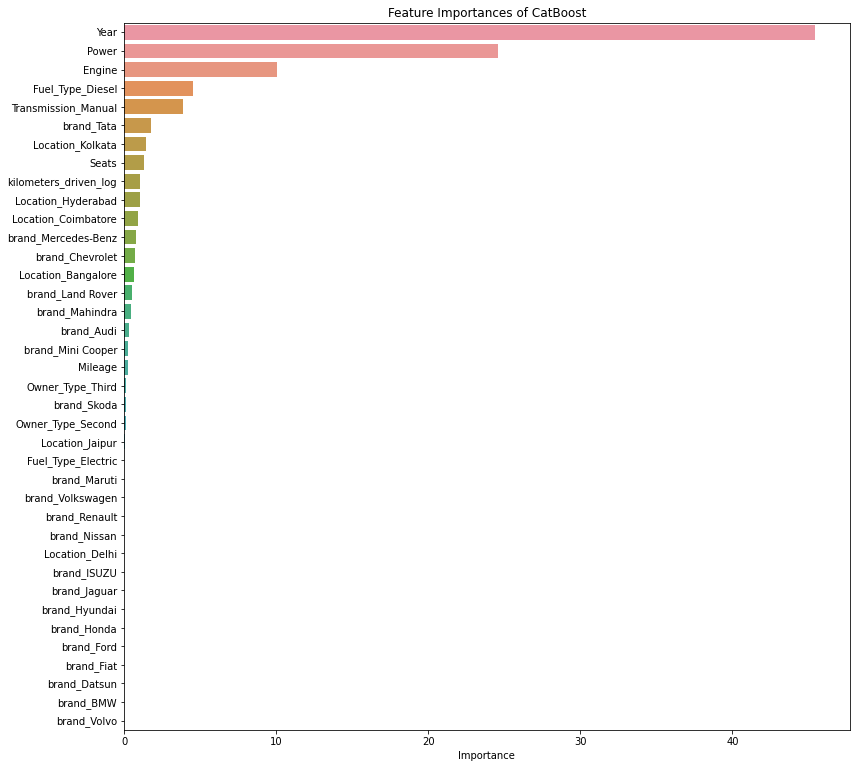

In [187]:
importances = model.feature_importances_

columns = X_train.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance, importance_df.index)

plt.title("Feature Importances of CatBoost")

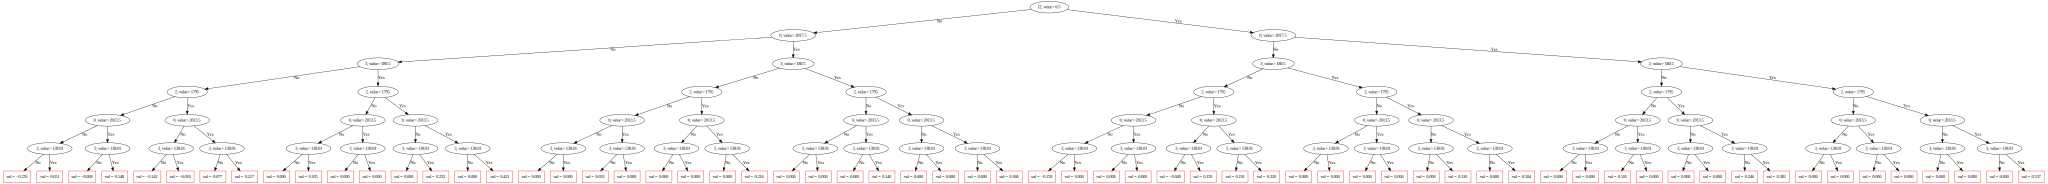

In [188]:
model.plot_tree(tree_idx=0)

In [189]:
# Defining list of models you have trained
models = [dtree, rr, model_lasso, RF, dtree_tuned, randomforest_tuned, knn, xgb_model, grid_search, gradient_reg, model]
#olsmodel1

#models = [lr, dtree, rr, model_lasso, RF, dtree_tuned, randomforest_tuned, knn, xgb_model, grid_search, gradient_reg, model]

# Defining empty lists to add train and test results
r2_train = []
r2_test = []
rmse_train = []
rmse_test = []

# Looping through all the models to get the rmse and r2 scores
for model in models:
    
    # Accuracy score
    j = get_model_score(model, False)
    
    r2_train.append(j[0])
    
    r2_test.append(j[1])
    
    rmse_train.append(j[2])
    
    rmse_test.append(j[3])

In [190]:


comparison_frame = pd.DataFrame({'Model':['Decision Tree','Ridge', 'Lasso','Random Forest','Turned Decision Tree','Turned Random Forest','Tuned_KNN', 'XGBoost','AdaBoost','GradientBoost','CatBoost' ], 
                                          'Train_r2': r2_train,'Test_r2': r2_test,
                                          'Train_RMSE': rmse_train,'Test_RMSE': rmse_test})

comparison_frame


,Model,Train_r2,Test_r2,Train_RMSE,Test_RMSE
0,Decision Tree,0.999997,0.789326,0.020693,5.115459
1,Ridge,0.852567,0.860248,4.289918,4.166371
2,Lasso,0.854212,0.862063,4.265922,4.139239
3,Random Forest,0.971678,0.875938,1.880251,3.925537
4,Turned Decision Tree,0.818296,0.781772,4.762479,5.206360
5,Turned Random Forest,0.926568,0.849099,3.027564,4.329382
6,Tuned_KNN,0.934302,0.827185,2.863694,4.633081
7,XGBoost,0.912270,0.892177,3.309223,3.659606
8,AdaBoost,0.745015,0.690030,5.641680,6.204959
9,GradientBoost,0.922227,0.895283,3.115763,3.606513


**Observations:    
-XGBoost, and GradientBoost have good balance between the result of training set and test set in R-squared and RSME. These models not overffiting and not under fitting.  
I am asumming above 0.7 is moderatelly correlated. The models above 70% that is good. So, all of my models are explained at least 70% of data.
In these models, RMSE are 3-5 which is I think acceptable. In Decision Tree, Tuned Decision Tree, and AdaBoost for Decision Tree, some of RSME are more than 5.    They don't explain accurately compared to other models.  

  





**

**Note:** You can also try some other algorithms such as KNN and compare the model performance with the existing ones.

### **Insights**

**Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

**Comparison of various techniques and their relative performance**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

**Proposal for the final solution design**:
- What model do you propose to be adopted? Why is this the best solution to adopt?